In [3]:
if False:
    table_tile = cutclass.getTableTile(tile_name='KIDS_40.6_-28.2')
    tab_to_use = gen_cutouts.apply_preprocessing(table_tile)[:50] 
    #gen_cutouts.cutout_by_name_tile(tile_name='KIDS_40.6_-28.2',table_tile=tab_to_use)

    #tab_to_use

    from astropy.io import fits
    #how to save numpy array as fits file
    for i in range(50):
        path=os.path.join(settings.path_to_save_imgs,'ugri_images','tile_{}_ID_{}'.format(tab_to_use['KIDS_TILE'][i],tab_to_use['ID'][i]))
        if not os.path.exists(path+'.fits'):
            img_tmp = utils.from_fits_to_array(settings.path_to_save_imgs,tab_to_use['ID'][i] ,tab_to_use['KIDS_TILE'][i], channels=['r','i','g'])
            img_tmp = np.transpose(img_tmp[:,:,:], (1,2,0))
            #np.save(path,img_tùmp)
            # save numpy array as fits file
            hdu = fits.PrimaryHDU(img_tmp)
            #try:
            hdu.writeto(path+'.fits',overwrite=True)
            #except OSError as e:
                #print(e)
        else:
            pass

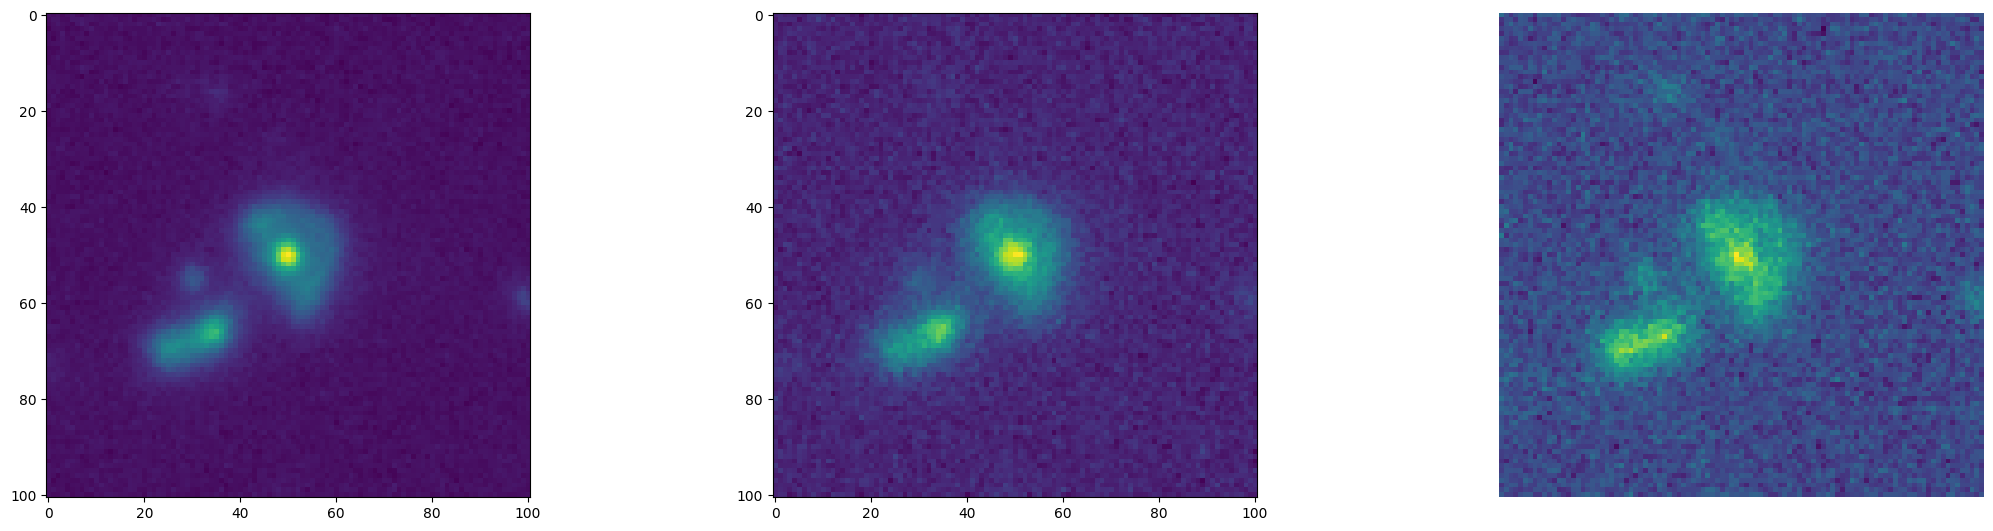

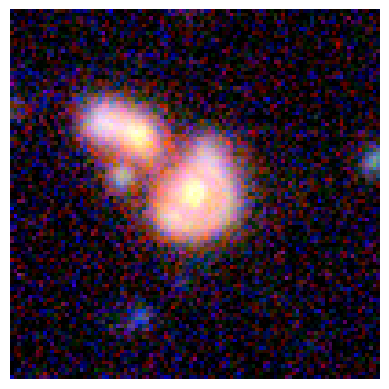

In [ ]:
img_tmp = utils.from_fits_to_array('/Users/mrgr/','KiDSDR4 J235920.307-290744.83',
                    'KiDS_DR4.0_0.0_-29.2', channels= ['r', 'i', 'g'])
utils.plot_oneimg_n_channels(img_tmp,channels= ['r', 'i', 'g'])
make_rgb.make_rgb_one_image(img_array = img_tmp.copy(), img_name = 'KiDSDR4 J235920.307-290744.83' ,tile_name ='KiDS_DR4.0_0.0_-29.2', display_plot=True, return_img=False)


In [119]:
import sys
sys.path.append('/Users/mrgr/Documents/GitHub/FiLeK/')
sys.path.append('/Users/mrgr/Documents/GitHub/KiDS_astronomaly/')
#import visualisation.tsne_plot
import numpy as np
import os
import glob
import importlib
import filek.utils as utils
import filek.gen_cutouts as gen_cutouts
from filek import cutclass
#import filek.models as models
import filek.settings as settings
from astropy.io import fits
import matplotlib.pyplot as plt
import filek.make_rgb as make_rgb
from filek.preprocessing import scaling_clipping
import pandas as pd
from astronomaly.preprocessing import image_preprocessing
import random

In [116]:
def create_2d_rgb_image(rgb_image):
    # Compute the average value across color channels
    average_color = np.mean(rgb_image, axis=2)
    return average_color


def plot_prep(img,kids_tile, kids_id, label=None, savefig=False, show_plot=False):

    plt.rcParams['figure.dpi'] = 200
    plt.rcParams.update({'font.size': 8}) # Decrease font size
    # Create a 2x3 grid of subplots
    fig, axs = plt.subplots(4, 5, figsize=(9, 8), dpi=200)


    # Plot the first subplot in the first row
    img_grey = image_preprocessing.grayscale_luminosity(img)
    axs[0, 0].imshow(img_grey)
    axs[0, 0].set_title('grey')

    img_rgb = make_rgb.make_rgb_one_image(img)
    # Plot the second subplot in the first row
    axs[0, 1].imshow(img[:,:,0])
    axs[0, 1].set_title('rband')

    img_sigma2 = image_preprocessing.image_transform_sigma_clipping(img_grey)
    # Plot the fourth subplot in the second row
    axs[1, 0].imshow(img_sigma2)
    axs[1, 0].set_title('sigma clipping grey')


    img_sigma1 = image_preprocessing.image_transform_sigma_clipping(img[:,:,0])
    # Plot the third subplot in the first row
    axs[1, 1].imshow(img_sigma1)
    axs[1, 1].set_title('sigma clipp rband')

    # Plot the fifth subplot in the second row
    axs[2, 0].imshow(image_preprocessing.image_transform_scale(img_sigma2))
    axs[2, 0].set_title('clip grey+scaling')

    # Plot the fifth subplot in the second row
    axs[2, 1].imshow(image_preprocessing.image_transform_scale(img_sigma1))
    axs[2, 1].set_title('clip rband+scaling')

    img_rgb = make_rgb.make_rgb_one_image(img_array=img, type_plot='marshall')
    axs[0, 2].imshow(img_rgb)
    axs[0, 2].set_title('RGB marshall')
    # Plot the fifth subplot in the second row
    axs[2, 2].imshow(scaling_clipping(img[:,:,0]))
    axs[2, 2].set_title('scaling clip rband')

    # Plot the fifth subplot in the second row
    axs[1, 2].imshow(scaling_clipping(img_grey))
    axs[1, 2].set_title('scaling clip grey')


    img_rgb2 = make_rgb.make_rgb_one_image(img_array=img, type_plot='lupton')
    axs[0, 3].set_title('RGB lupton')
    axs[0, 3].imshow(img_rgb2)

    rgb_2dim2 = create_2d_rgb_image(img_rgb2)
    axs[1, 3].imshow(rgb_2dim2)
    axs[1, 3].set_title('2D lupton')

    axs[2, 3].imshow( image_preprocessing.image_transform_sigma_clipping(rgb_2dim2))
    axs[2, 3].set_title('sigma clip lupton')

    axs[3, 3].imshow(scaling_clipping(rgb_2dim2))
    axs[3, 3].set_title('scaling clip 2Dlupton')
    
    inv_sinh = image_preprocessing.image_transform_inverse_sinh(img[:,:,0])
    axs[1, 4].imshow(inv_sinh)
    axs[1, 4].set_title('r-band invsinh')
        
    axs[2, 4].imshow(image_preprocessing.image_transform_sigma_clipping(inv_sinh))
    axs[2, 4].set_title('sigma clip r-band invsinh')

    rig_2dim2 = create_2d_rgb_image(img)
    axs[3, 4].imshow(image_preprocessing.image_transform_sigma_clipping(rig_2dim2))
    axs[3, 4].set_title('sigma clip grey invsinh')

    axs[3, 0].imshow(img[:,:,0])
    axs[3, 0].set_title('r-band')

    axs[3, 1].imshow(img[:,:,1])
    axs[3, 1].set_title('i-band')

    axs[3, 2].imshow(img[:,:,2])
    axs[3, 2].set_title('g-band')

    axs[0, 4].imshow( image_preprocessing.image_transform_inverse_sinh(img[:,:,0]))
    axs[0, 4].set_title('r band inv sinh')



    # remove the x and y ticks
    for i in range(len(axs)):
            for j in range(len(axs[i])):
                axs[i,j].set_xticks([])
                axs[i,j].set_yticks([])


    
    # Adjust the spacing between subplots
    plt.tight_layout()
    # Add a ctitle to the figure
    fig.subplots_adjust(top=0.9)
    fig.subplots_adjust(wspace=0.2)
    
    fig.suptitle(f'LABEL {int(label)} TILE {kids_tile} ID {kids_id}')
    if savefig:
        plt.savefig(os.path.join('/Users/mrgr/Documents/GitHub/KiDS_astronomaly/example_data/KiDS_cutouts/mock/PlotsPrep',f'TILE_{kids_tile}_ID_{kids_id}.png'), dpi=300)
    if show_plot:
        plt.show()
    # Show the plot
    plt.close()


In [125]:
df_list_obj= pd.read_csv(os.path.join(settings.path_to_save_imgs,'mock','df_tot.csv')).drop_duplicates(subset='KIDS_ID').reset_index(drop=True)[:-1]
df_list_obj['FOLDER'] =  os.path.join(settings.path_to_save_imgs,'mock')

sample = random.sample(range(0, len(df_list_obj) + 1), 100)
for i in sample:
    img = utils.from_fits_to_array(df_list_obj['FOLDER'].iloc[i],
                                df_list_obj['KIDS_ID'].iloc[i] ,df_list_obj[ 'KIDS_TILE'].iloc[i],  
                                channels=['r', 'i','g'])
    img = np.transpose(img, (1,2,0)) 

    plot_prep(img, df_list_obj[ 'KIDS_TILE'].iloc[i],df_list_obj['KIDS_ID'].iloc[i], 
                label=df_list_obj[ 'LABEL_TE'].iloc[i],savefig=True, show_plot=False )


In [5]:
import matplotlib.pyplot as plt

df_list_obj= pd.read_csv(os.path.join(filek.settings.path_to_save_imgs,'mock','df_tot.csv')).drop_duplicates(subset='KIDS_ID').reset_index(drop=True)[:-1]
df_list_obj['FOLDER'] =  os.path.join(filek.settings.path_to_save_imgs,'mock')

for i in range(len(df_list_obj)):
    img = filek.utils.from_fits_to_array(df_list_obj['FOLDER'].iloc[i],
                                df_list_obj['KIDS_ID'].iloc[i] ,df_list_obj[ 'KIDS_TILE'].iloc[i],  
                                channels=['r', 'i','g'])
    img = np.transpose(img, (1,2,0)) 

    plot_prep(img, df_list_obj[ 'KIDS_TILE'].iloc[i],df_list_obj['KIDS_ID'].iloc[i], 
              label=df_list_obj[ 'LABEL_TE'].iloc[i],savefig=True )



In [8]:
from isotree import IsolationForest

In [11]:
model = IsolationForest(ndim=1, ntrees=10).fit(features)
scores = model.decision_function(features)


# check on the grayscale types 

In [132]:

def grayscale_average(image):
    # Convert the image to grayscale using the average method
    gray = np.mean(image, axis=2)
    return gray

def grayscale_luminosity(image):
    # Convert the image to grayscale using the luminosity method
    gray = np.dot(image, [0.21, 0.72, 0.07])
    return gray

def grayscale_lightness(image):
    # Convert the image to grayscale using the lightness method
    gray = np.max(image, axis=2)
    return gray

def grayscale_desaturation(image):
    # Convert the image to grayscale using the desaturation method
    gray = np.clip((np.max(image, axis=2) + np.min(image, axis=2)) / 2, 0, 255)
    return gray

def grayscale_single_channel(image):
    # Convert the image to grayscale using a single channel (e.g., red channel)
    gray = image[:, :, 0]
    return gray

def all_greys(image, kids_tile, kids_id, label=None,cmap= 'plasma', savefig=False, show_plot=True):# Apply grayscale methods
    gray_average = grayscale_average(image)
    gray_luminosity = grayscale_luminosity(image)
    gray_lightness = grayscale_lightness(image)
    gray_desaturation = grayscale_desaturation(image)
    gray_single_channel = grayscale_single_channel(image)

    # Create subplots for visualization
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))

    # Original Image
    axes[0, 0].imshow(make_rgb.make_rgb_one_image(img_array=image, type_plot='lupton'))
    axes[0, 0].set_title('Original rgb')
    axes[0, 0].axis('off')

    # Grayscale using Average method
    axes[0, 1].imshow(gray_average, cmap=cmap)
    axes[0, 1].set_title('Grayscale (Average)')
    axes[0, 1].axis('off')

    # Grayscale using Luminosity method
    axes[0, 2].imshow(gray_luminosity, cmap=cmap)
    axes[0, 2].set_title('Grayscale (Luminosity)')
    axes[0, 2].axis('off')

    # Grayscale using Lightness method
    axes[1, 0].imshow(gray_lightness, cmap=cmap)
    axes[1, 0].set_title('Grayscale (Lightness)')
    axes[1, 0].axis('off')

    # Grayscale using Desaturation method
    axes[1, 1].imshow(gray_desaturation, cmap=cmap)
    axes[1, 1].set_title('Grayscale (Desaturation)')
    axes[1, 1].axis('off')

    # Grayscale using Single Channel (Red) method
    axes[1, 2].imshow(gray_single_channel, cmap=cmap)
    axes[1, 2].set_title('Grayscale (Single Channel)')
    axes[1, 2].axis('off')

    plt.tight_layout()
    fig.subplots_adjust(top=0.9)

    fig.suptitle(f'LABEL {int(label)} TILE {kids_tile} ID {kids_id}')
    if savefig:
        plt.savefig(os.path.join('/Users/mrgr/Documents/GitHub/KiDS_astronomaly/example_data/KiDS_cutouts/mock/PlotsGrey',f'TILE_{kids_tile}_ID_{kids_id}.png'), dpi=300)
    if show_plot:
        plt.show()
    # Show the plot
    plt.close()
  


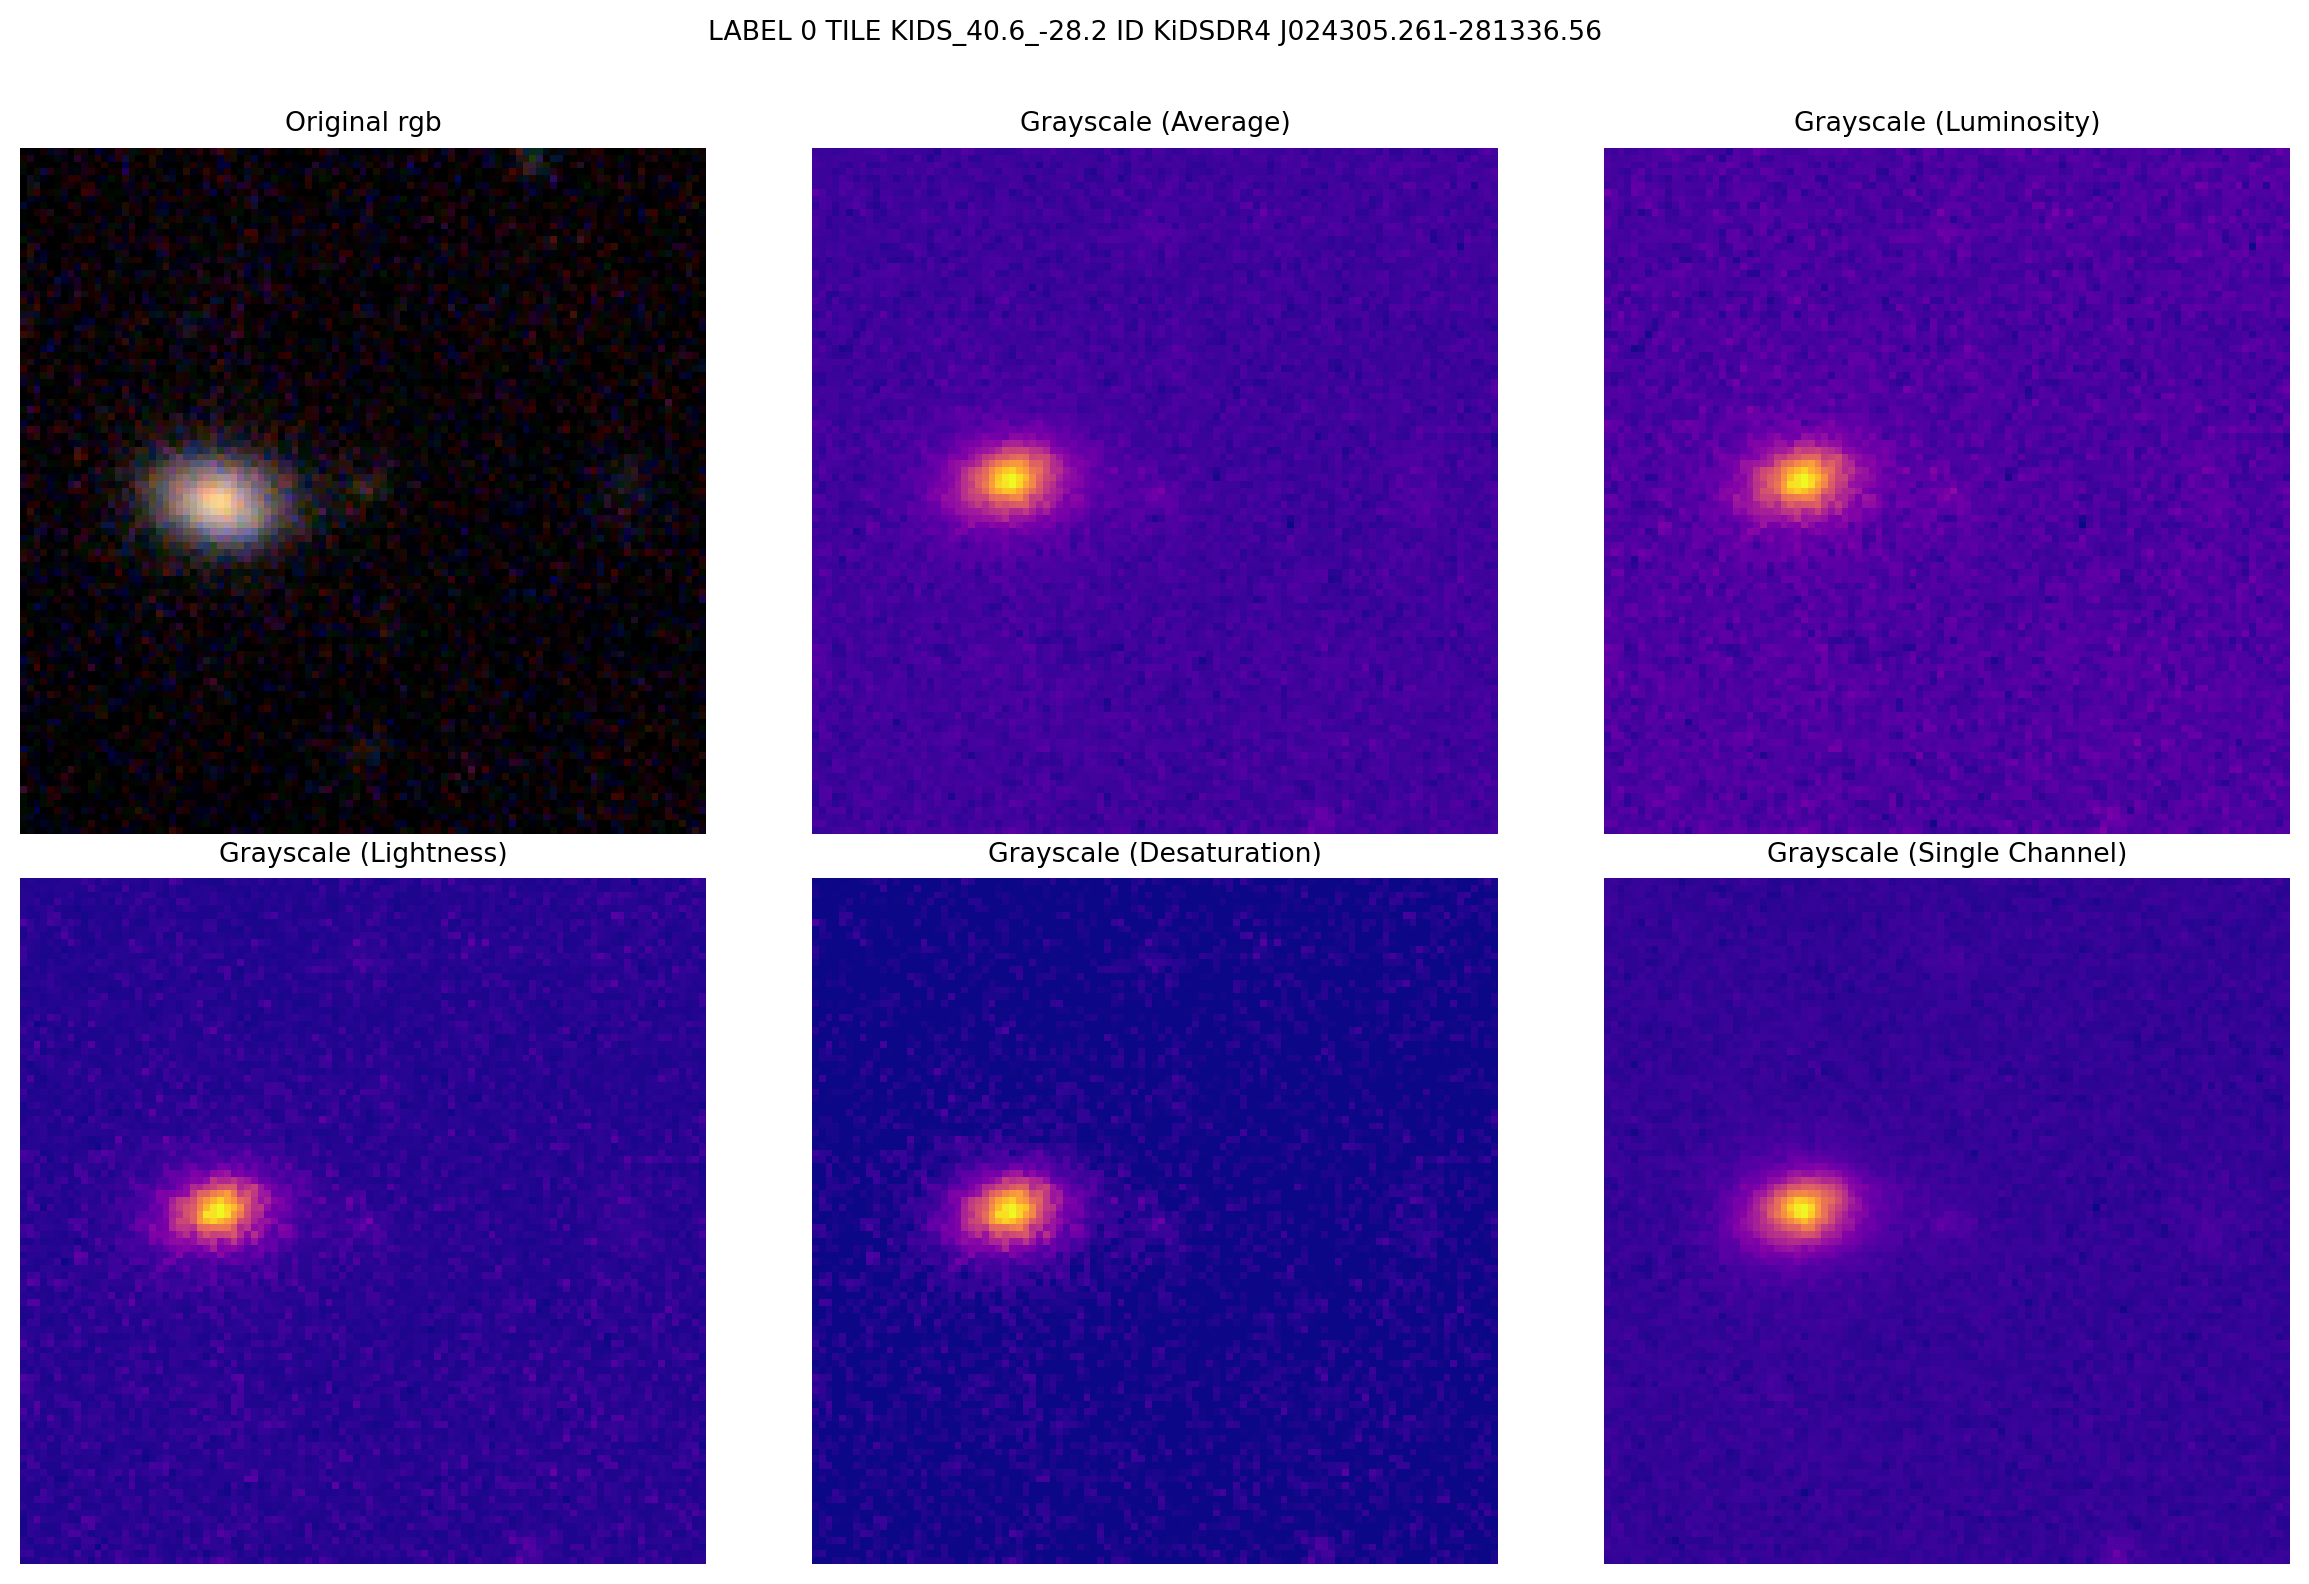

In [133]:
i=0
img = utils.from_fits_to_array(df_list_obj['FOLDER'].iloc[i],
                        df_list_obj['KIDS_ID'].iloc[i] ,df_list_obj[ 'KIDS_TILE'].iloc[i],  
                        channels=['r', 'i','g'])
img = np.transpose(img, (1,2,0)) 

all_greys(img, df_list_obj[ 'KIDS_TILE'].iloc[i],df_list_obj['KIDS_ID'].iloc[i], 
              label=df_list_obj[ 'LABEL_TE'].iloc[i],savefig=True )

In [122]:
sample

[1682, 1353, 1083, 1705, 1471, 1586, 1096, 1810, 1281, 1133]

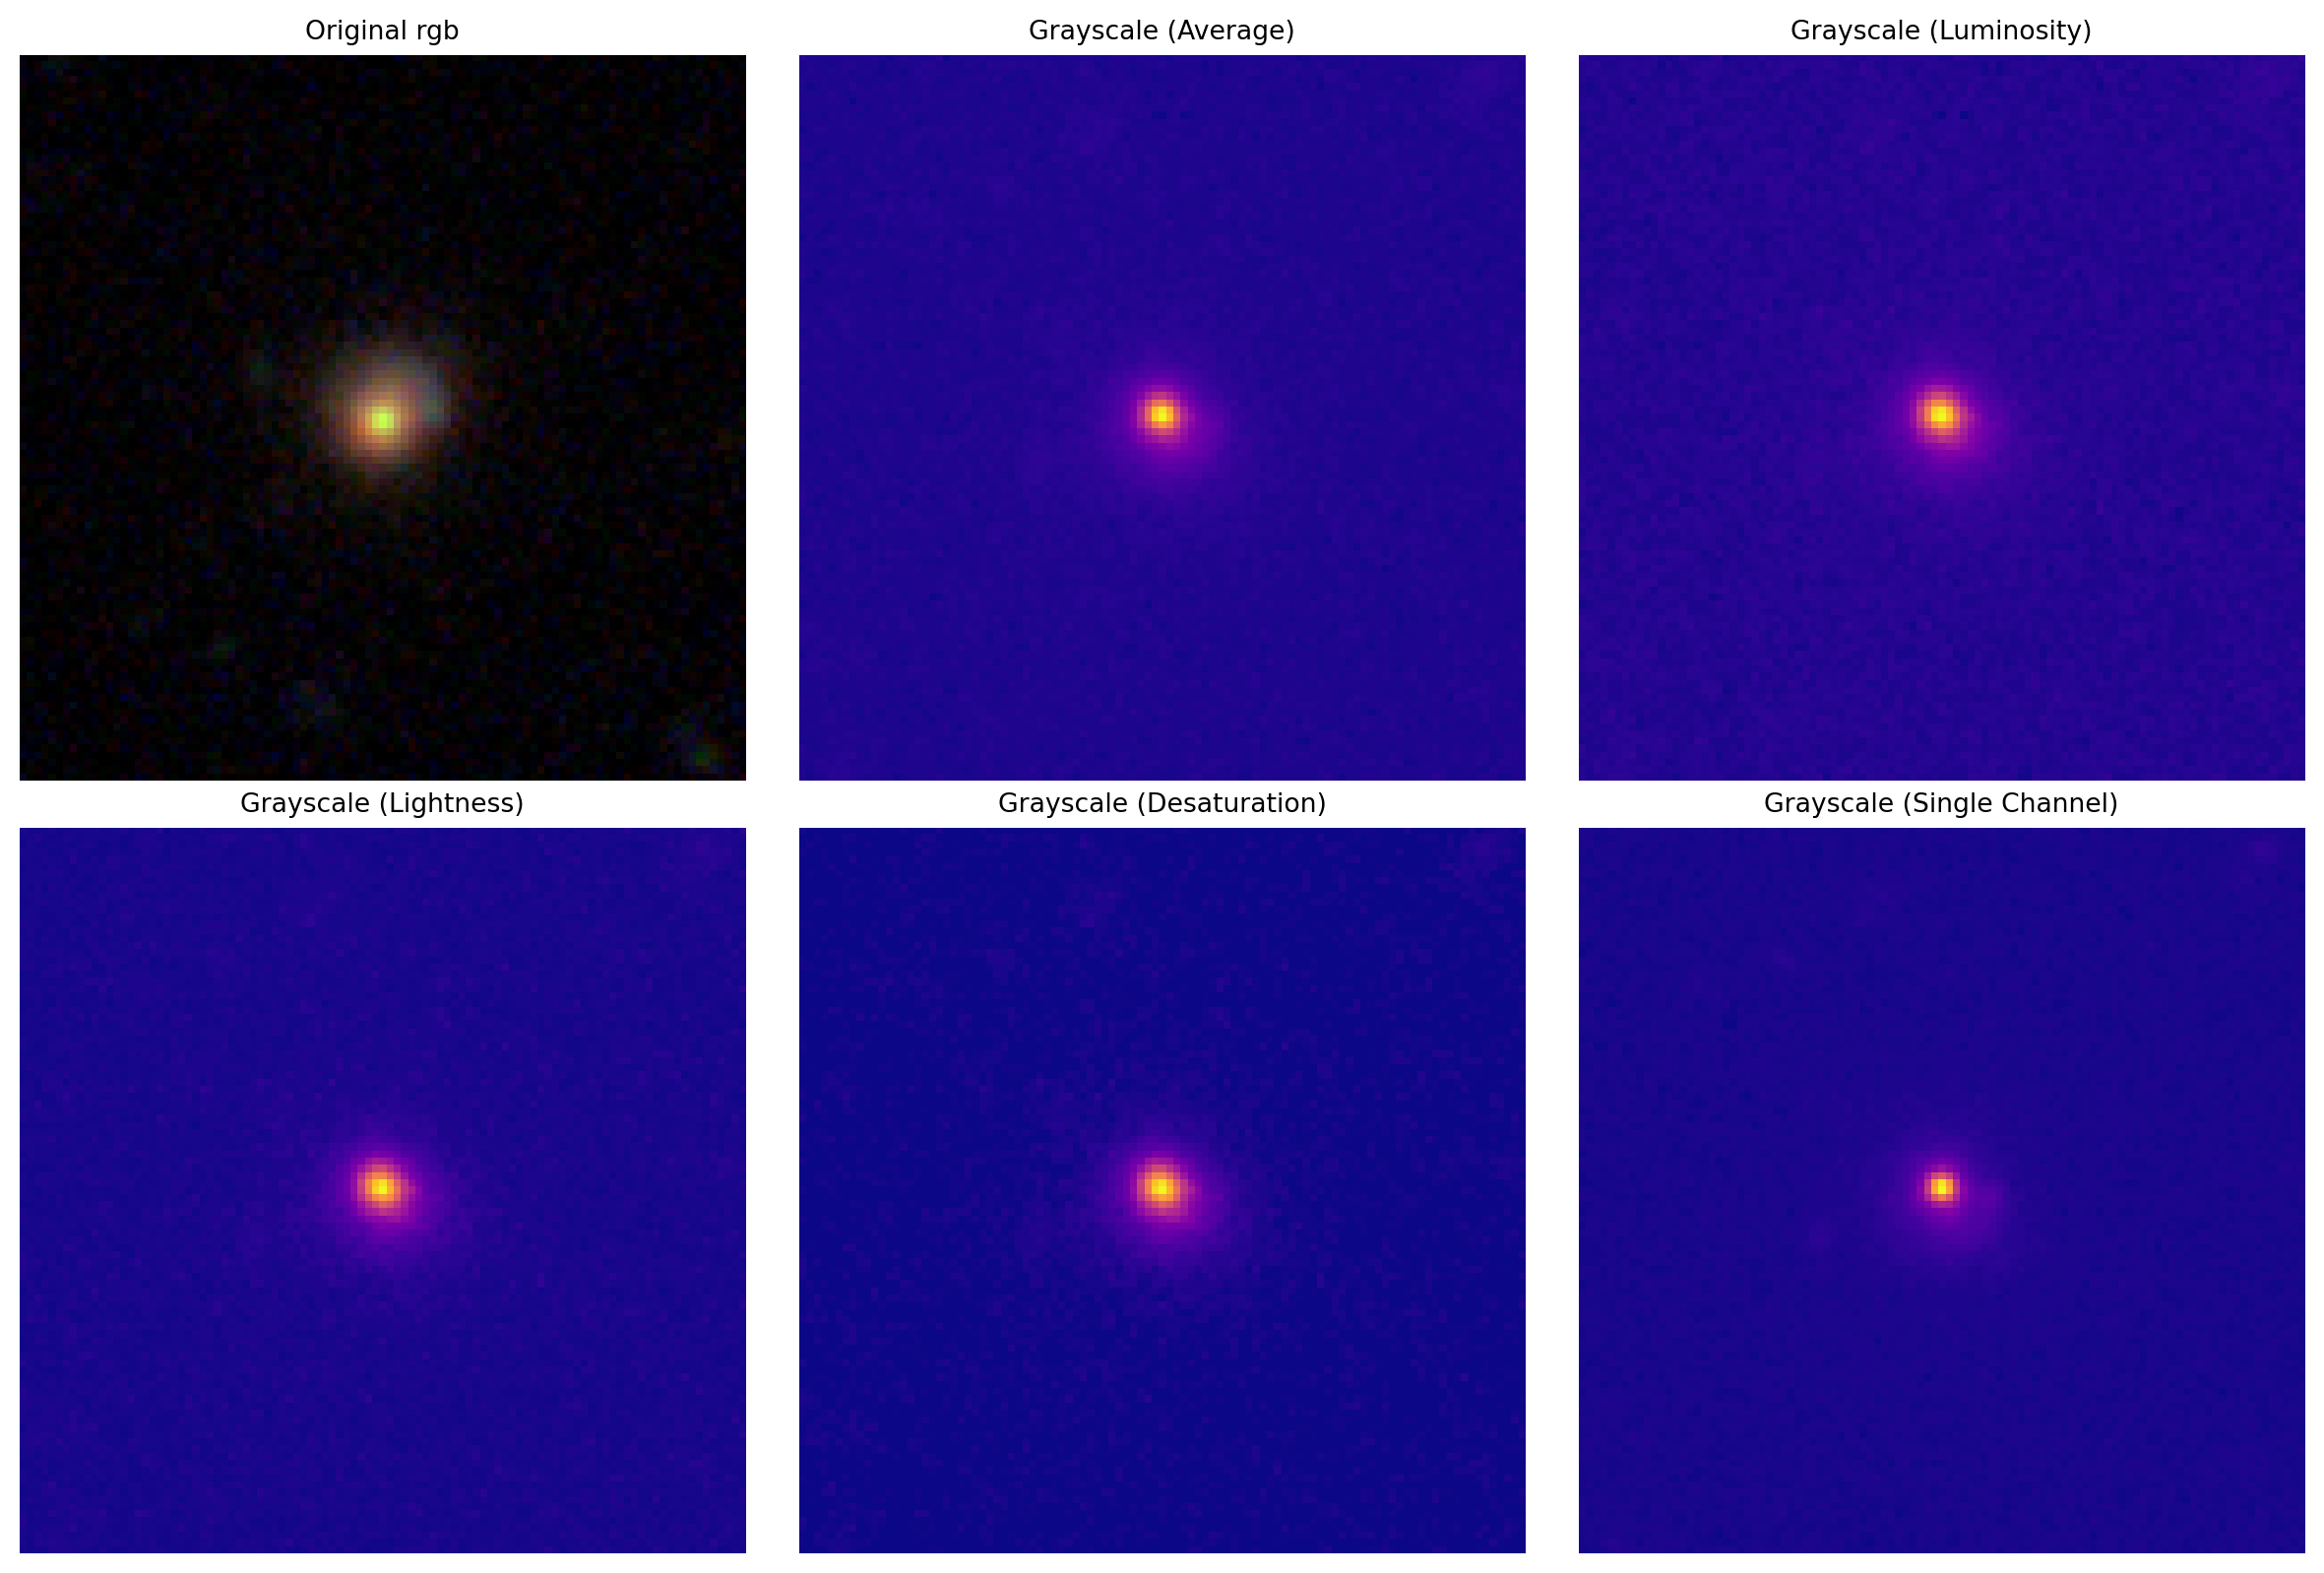

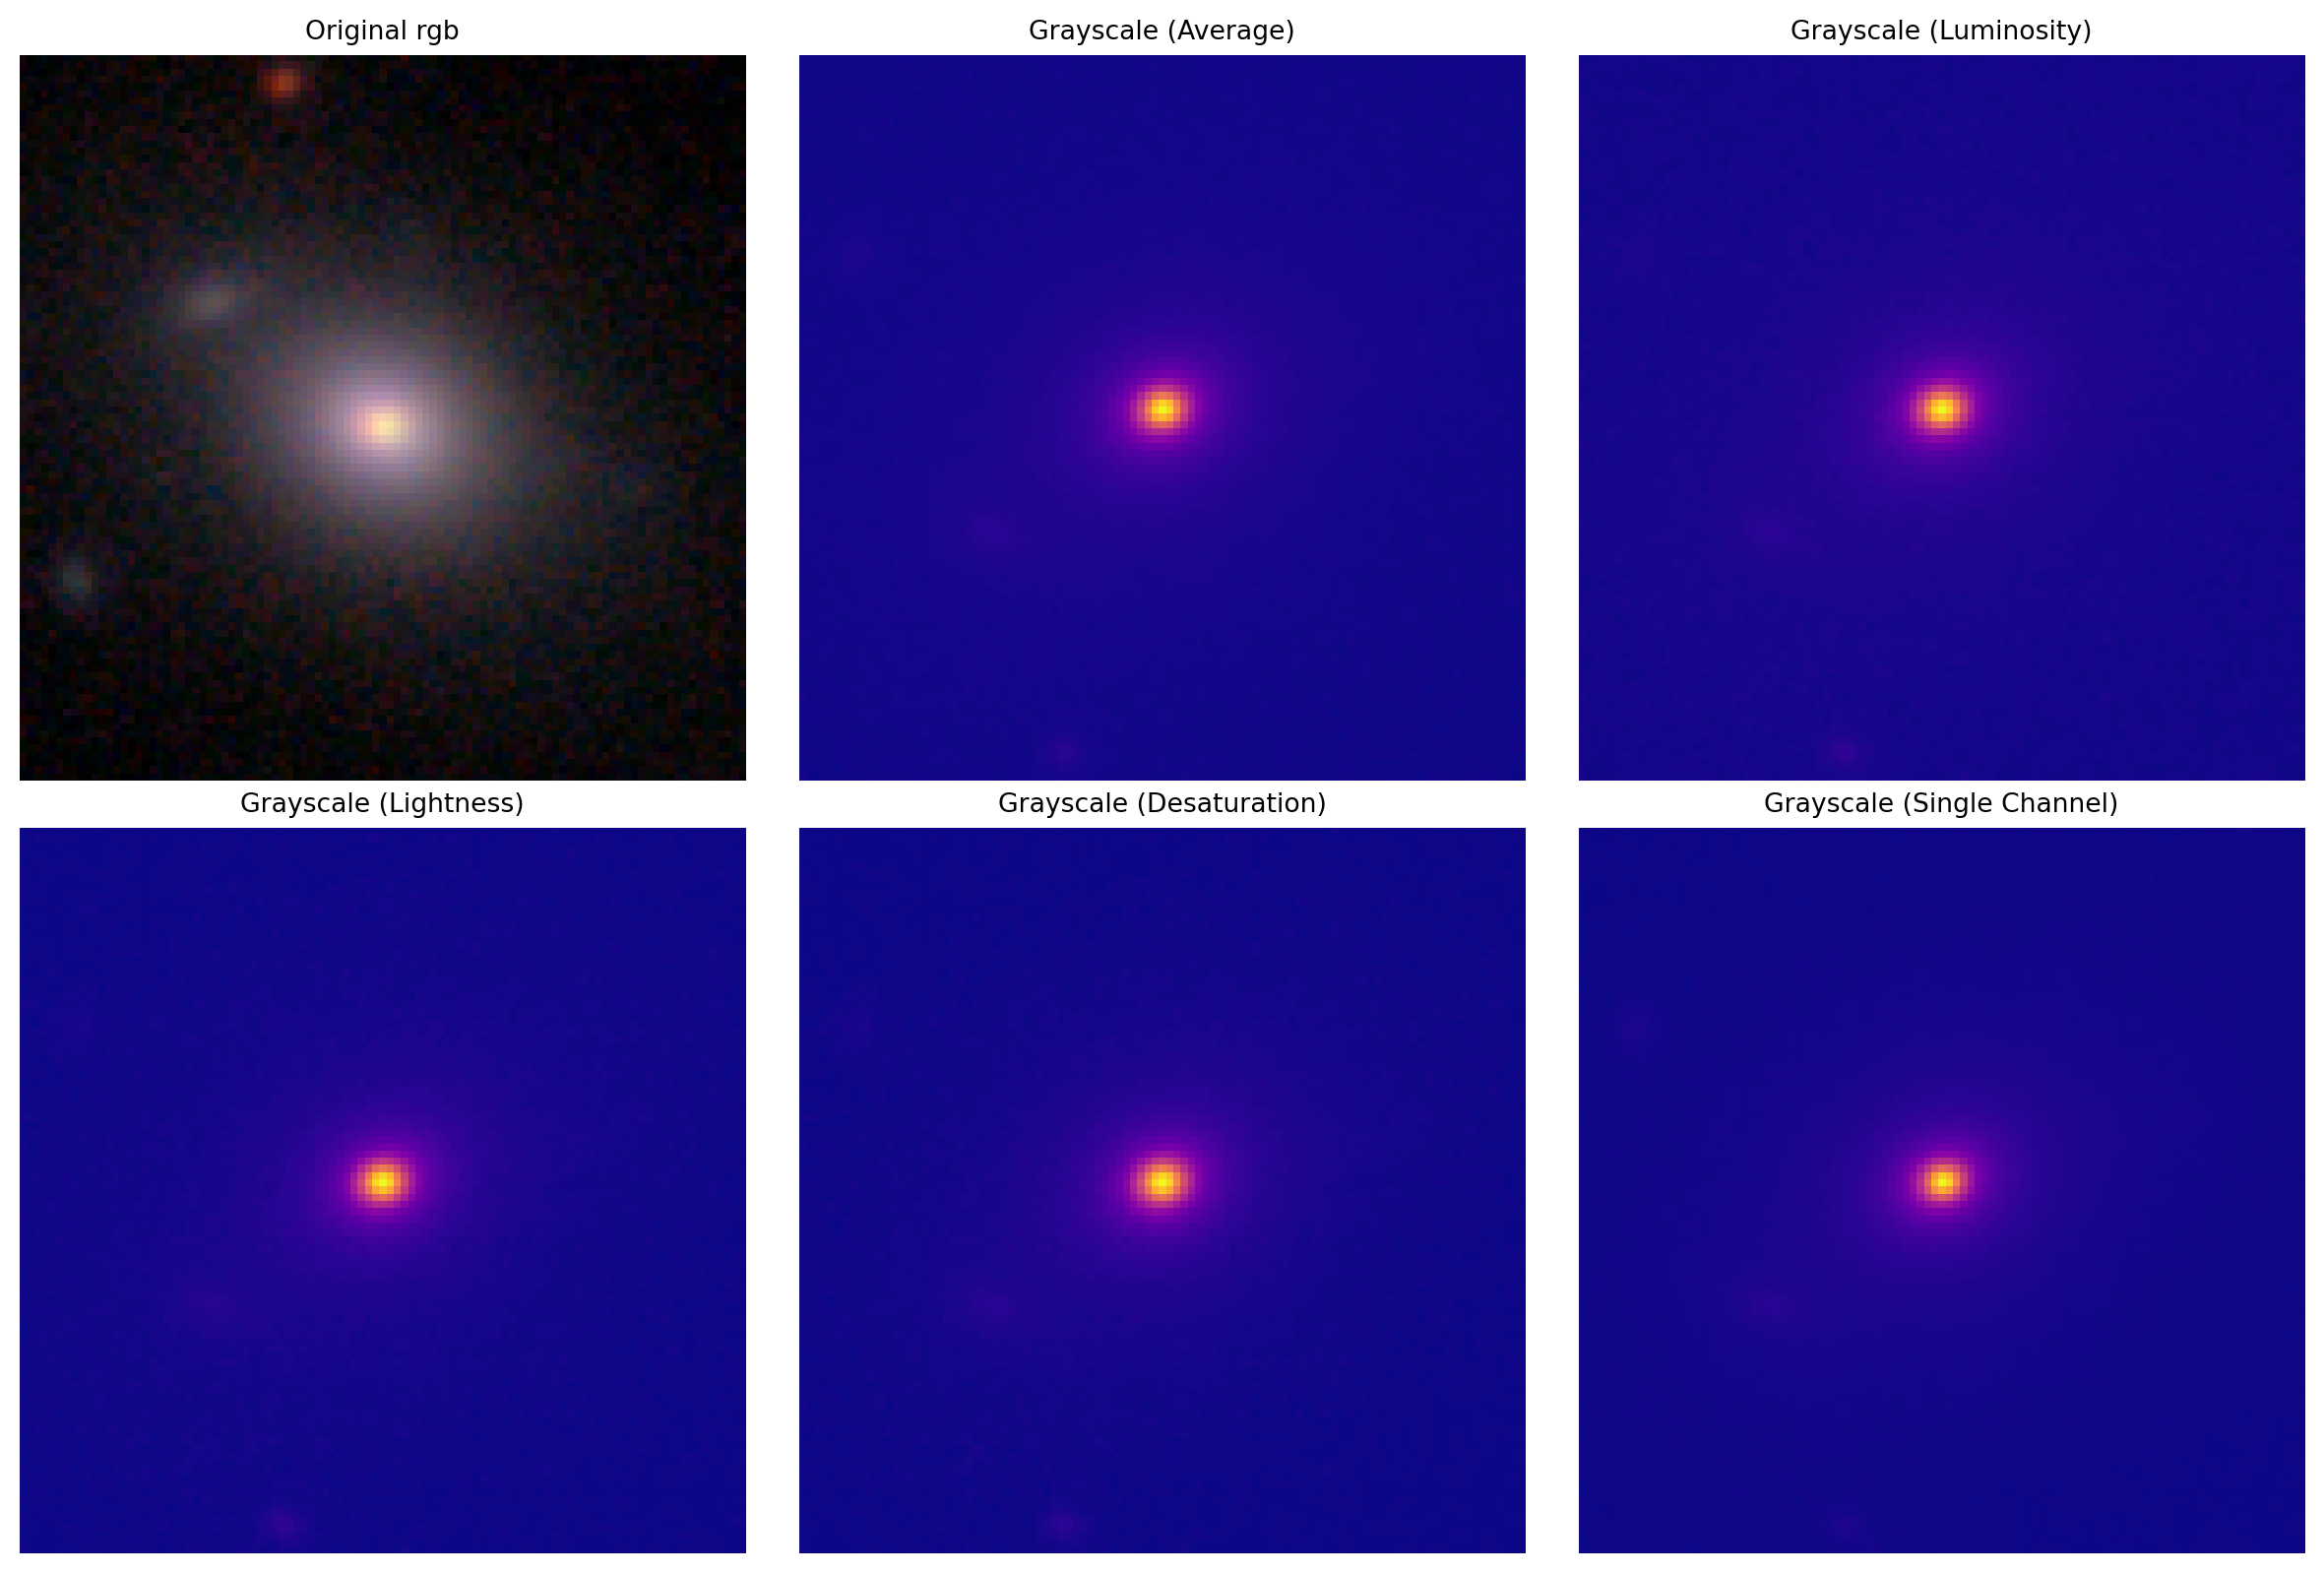

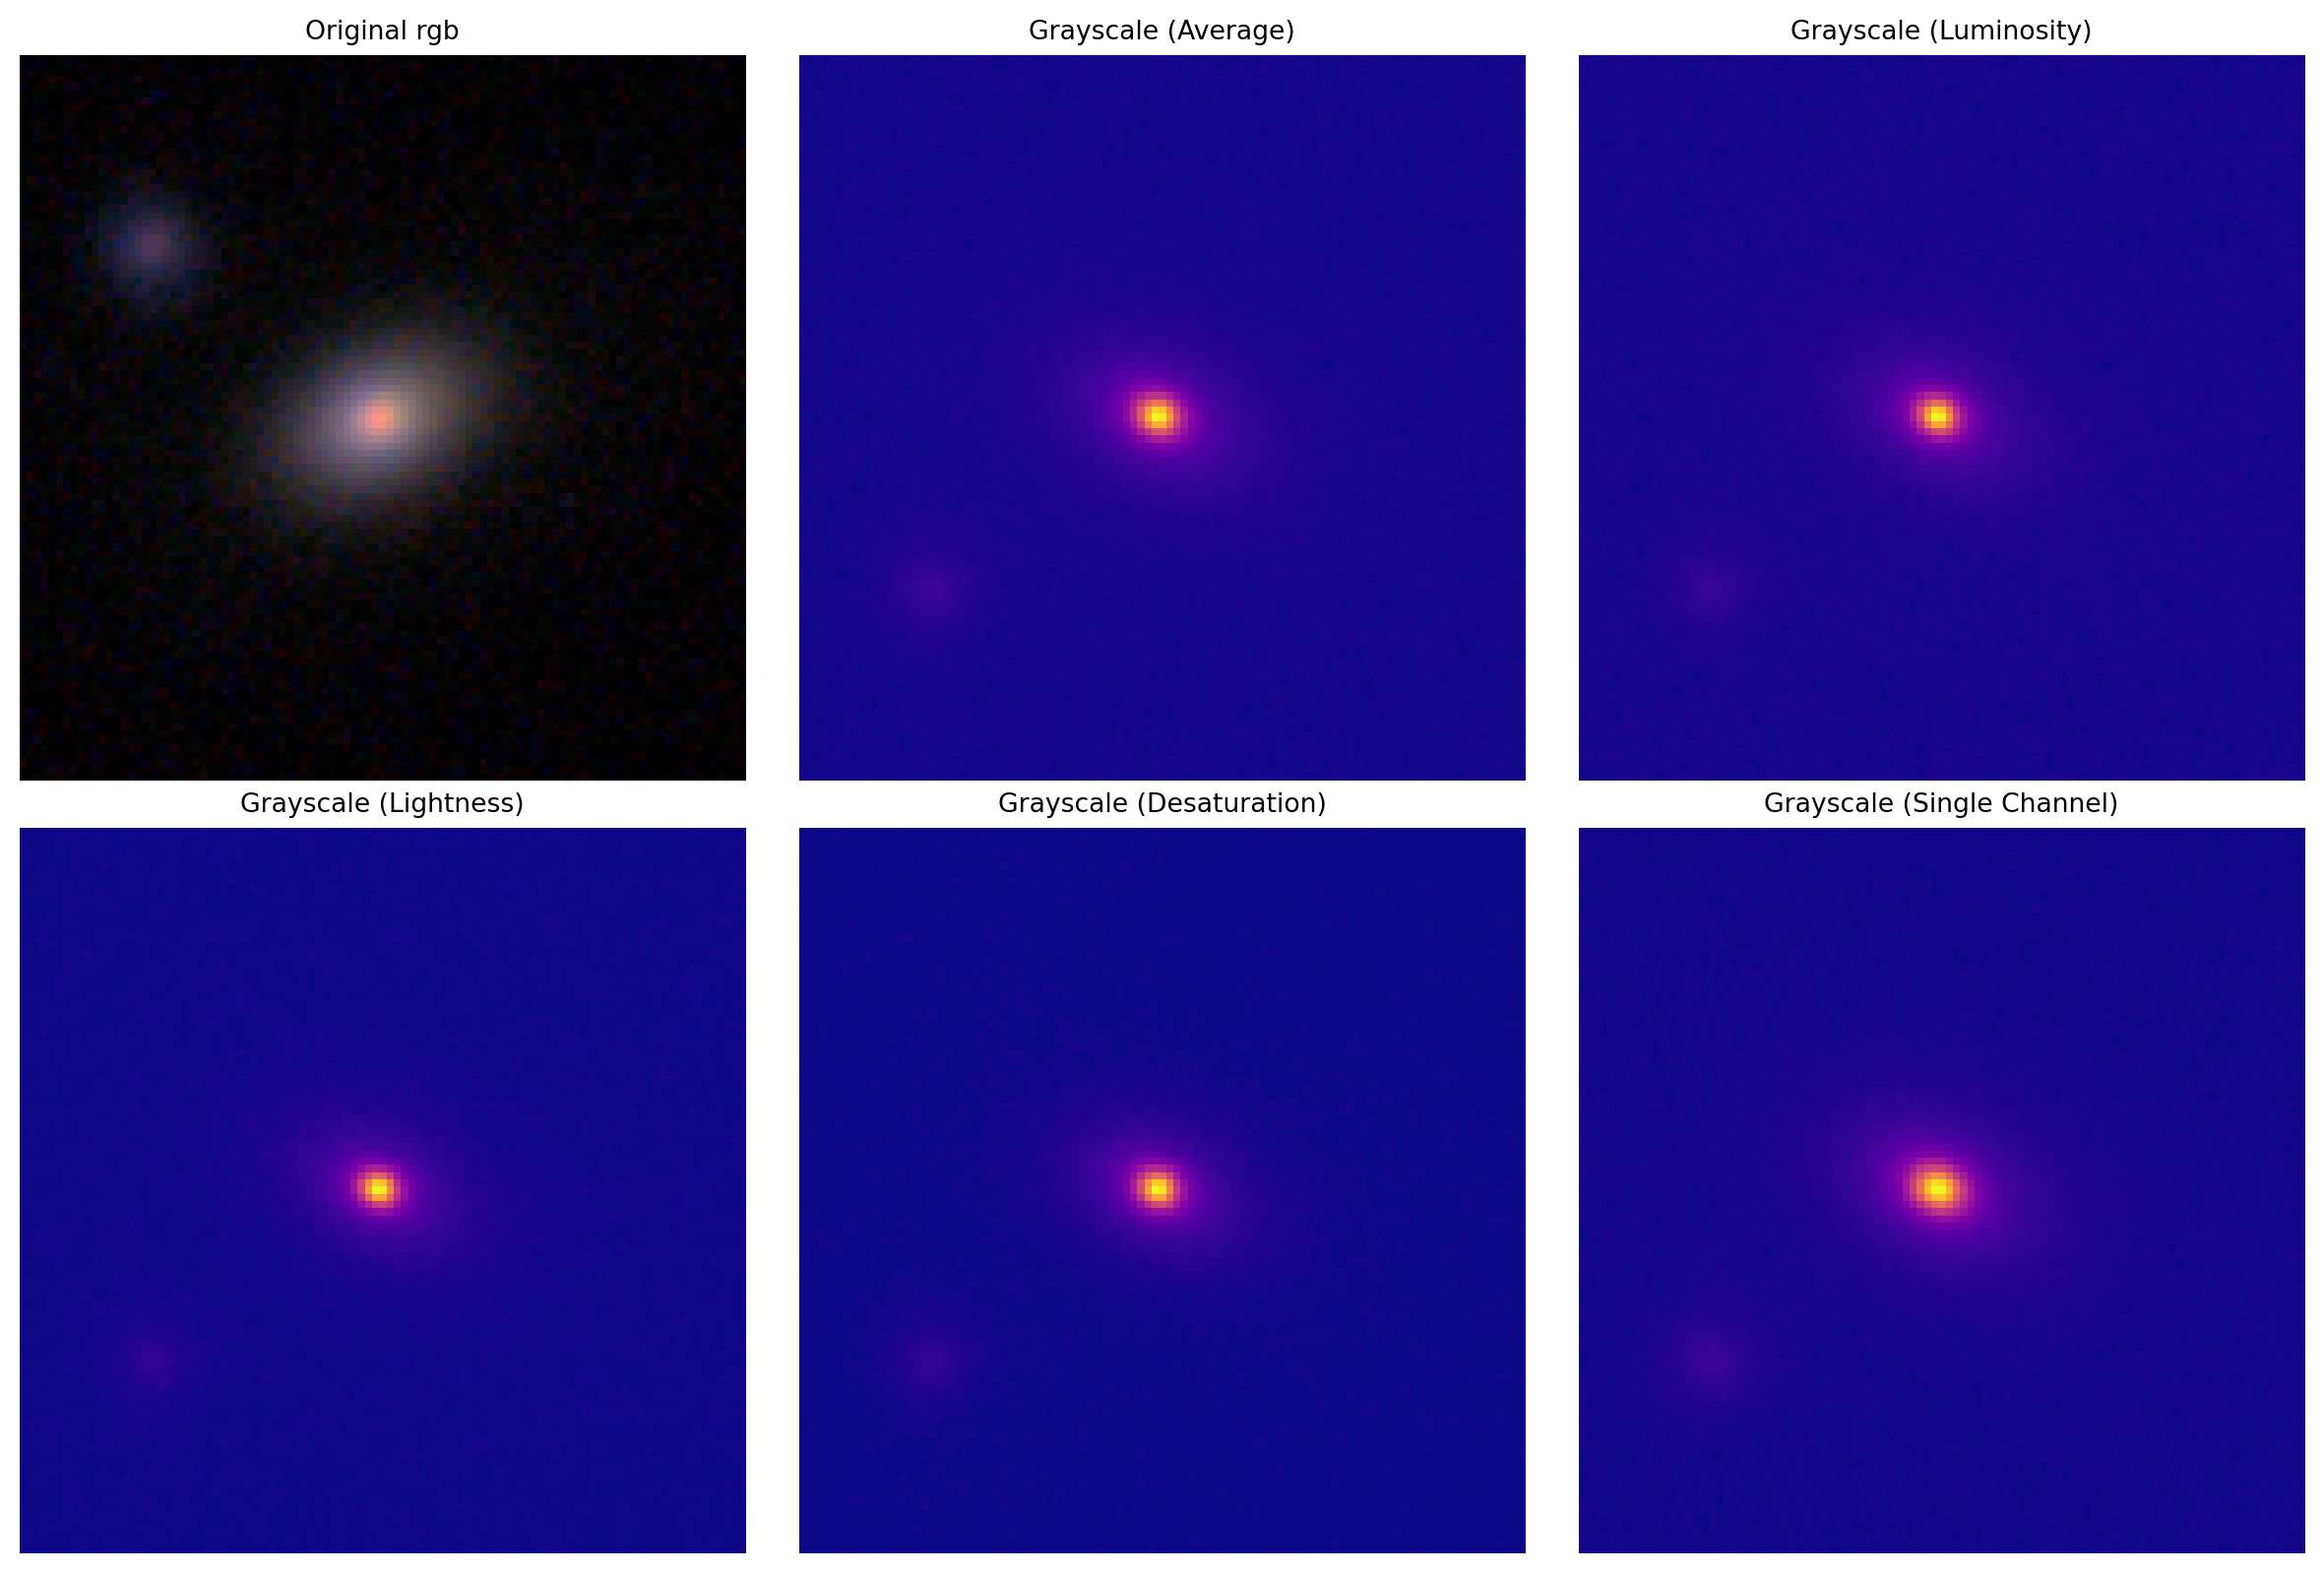

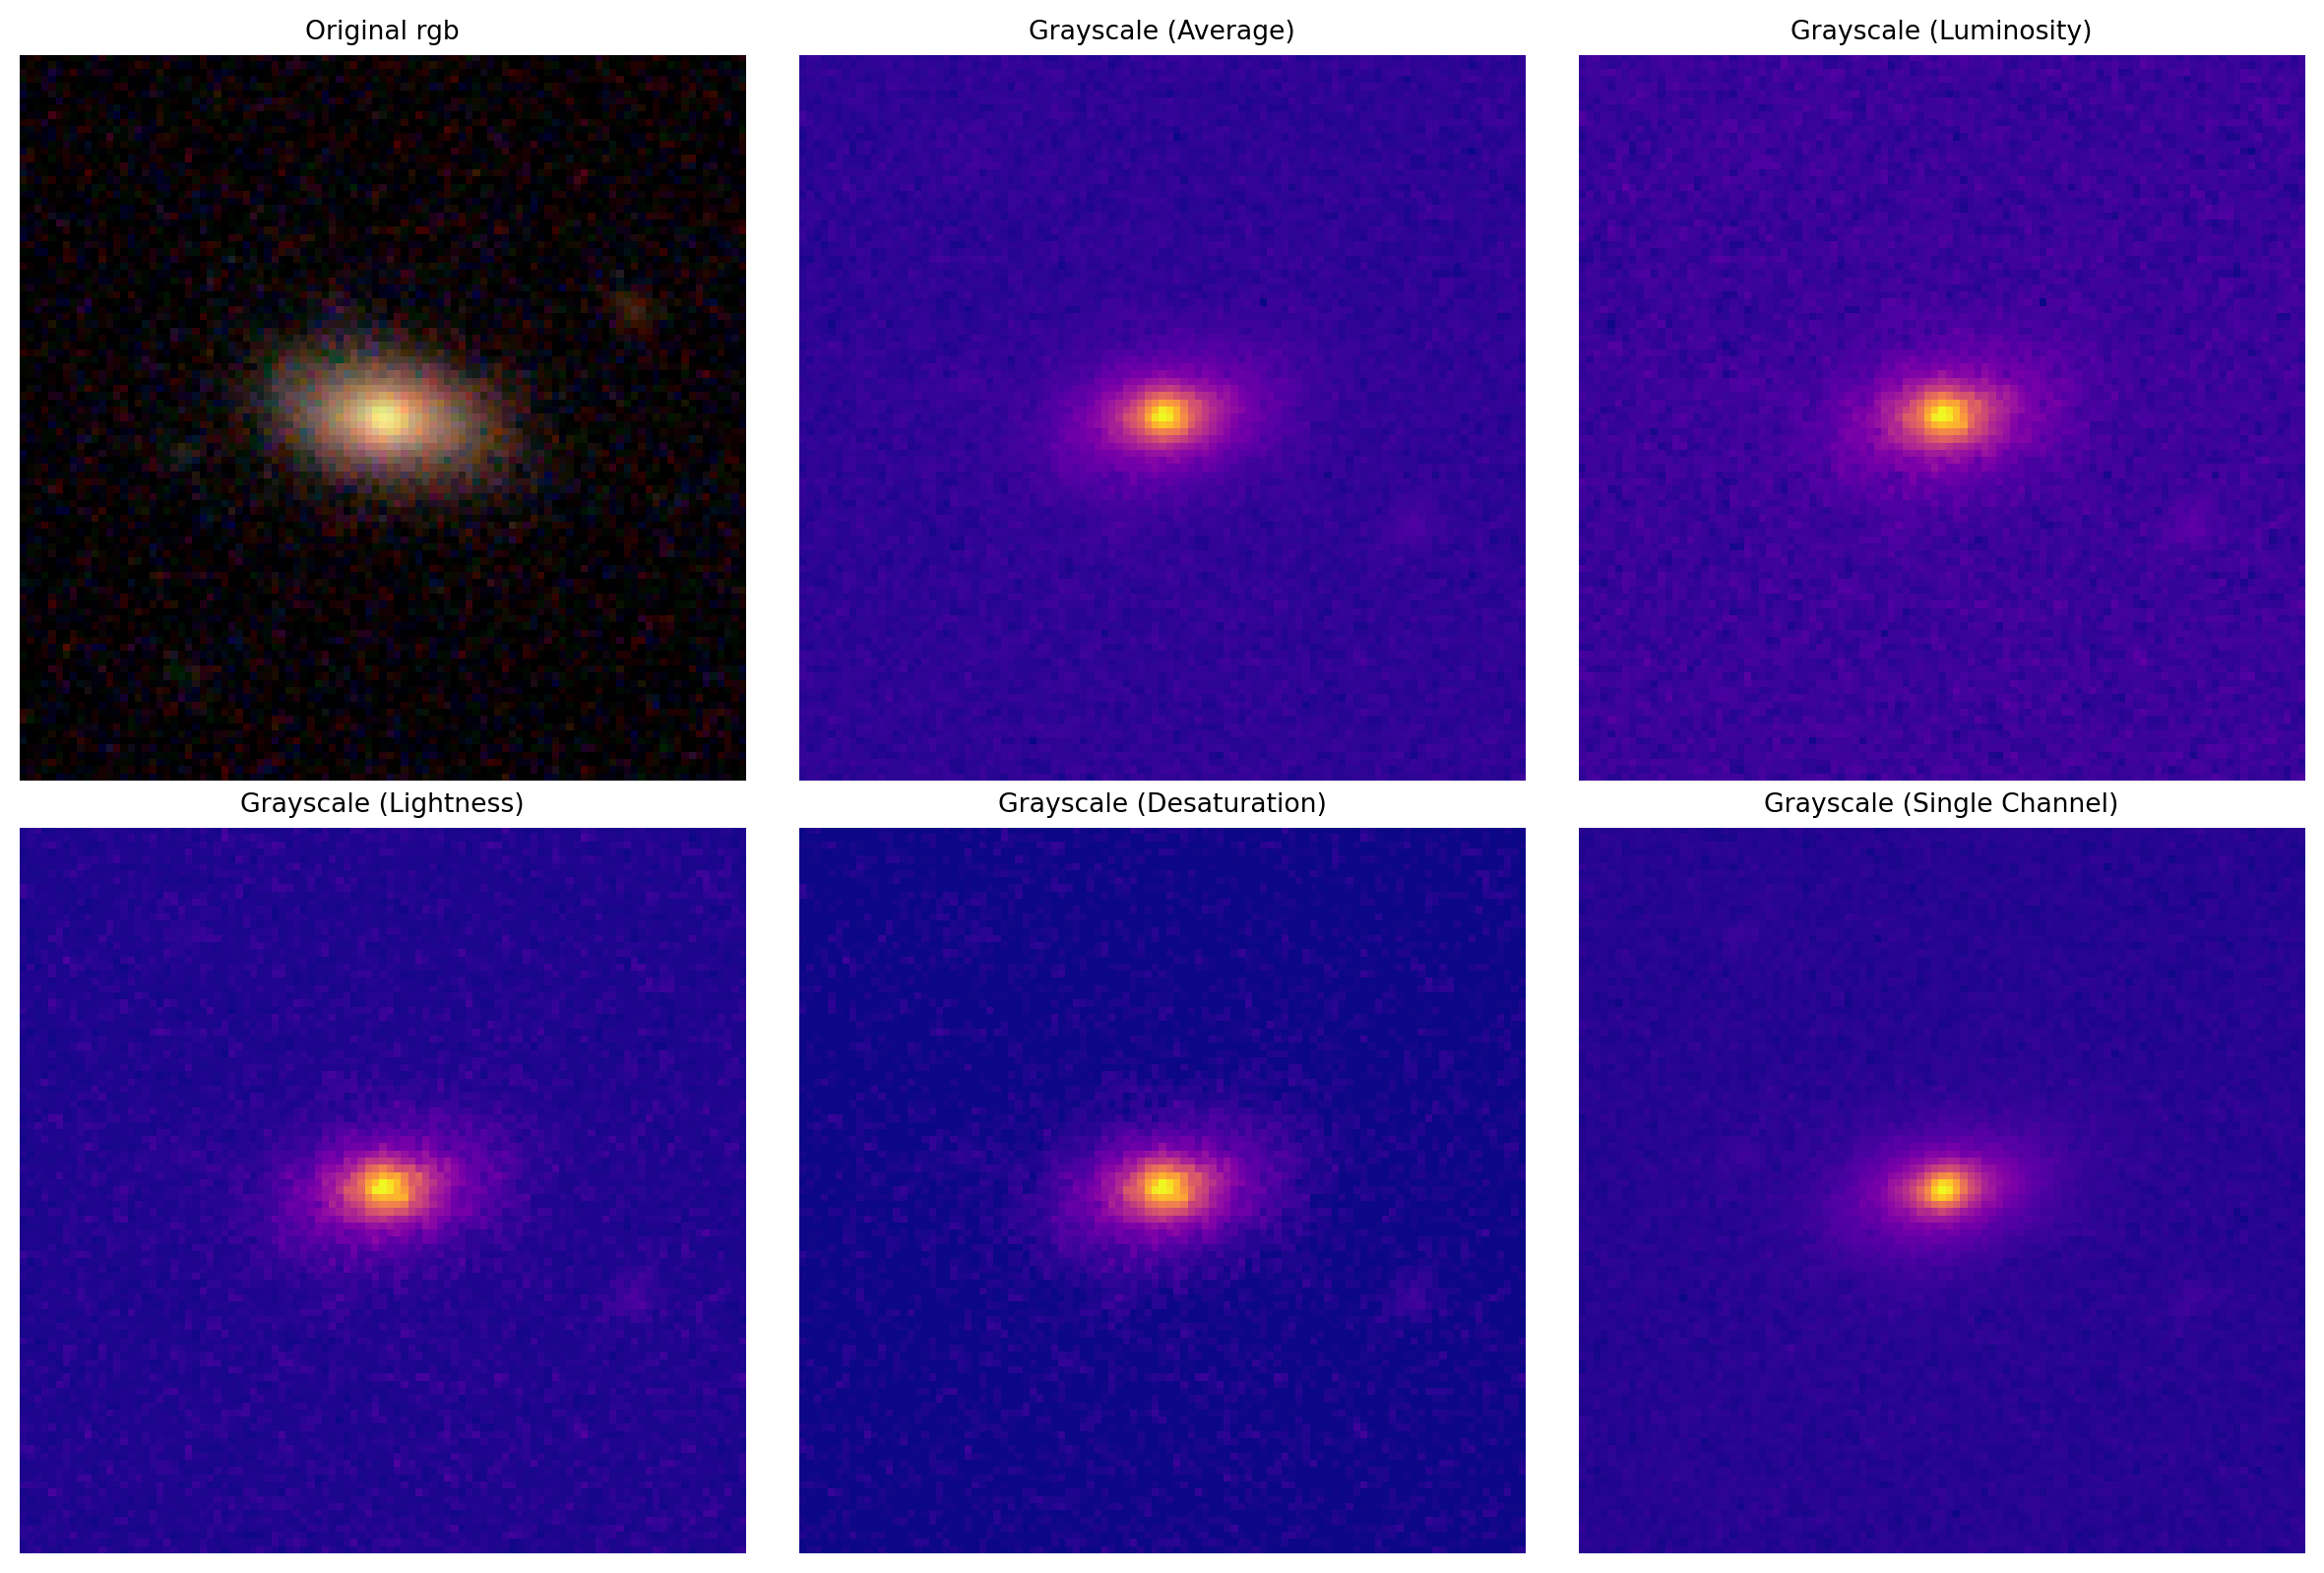

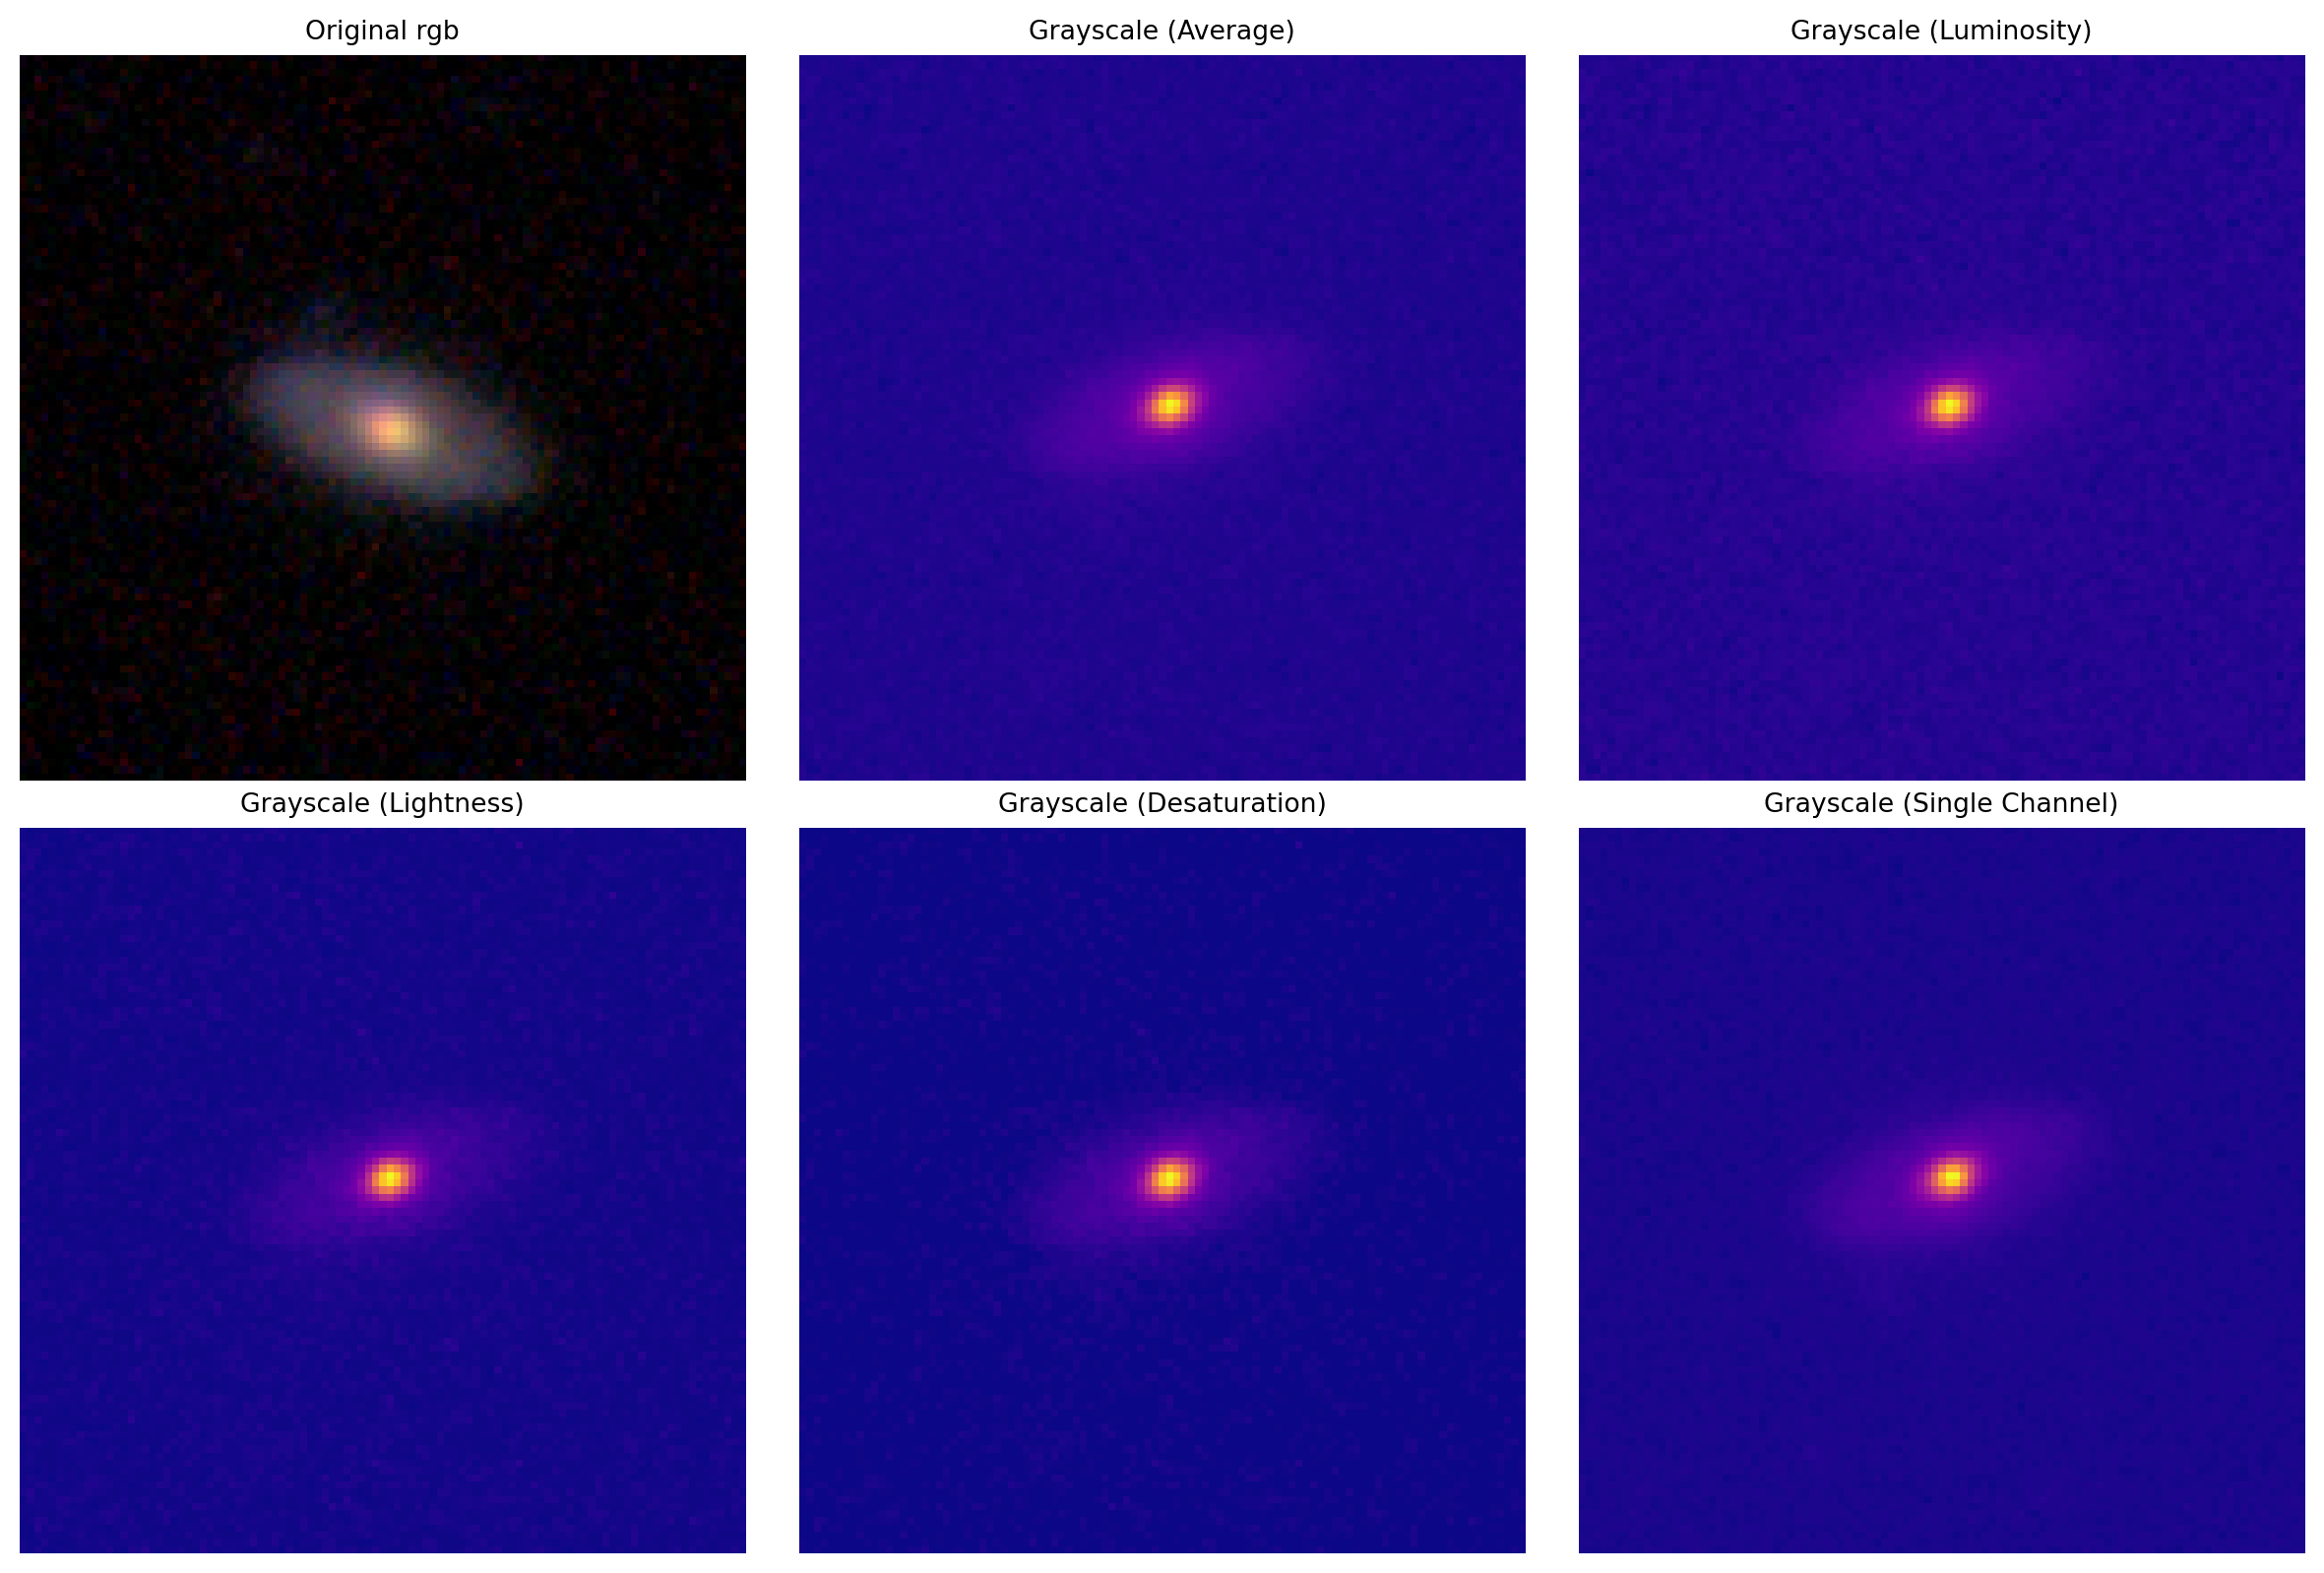

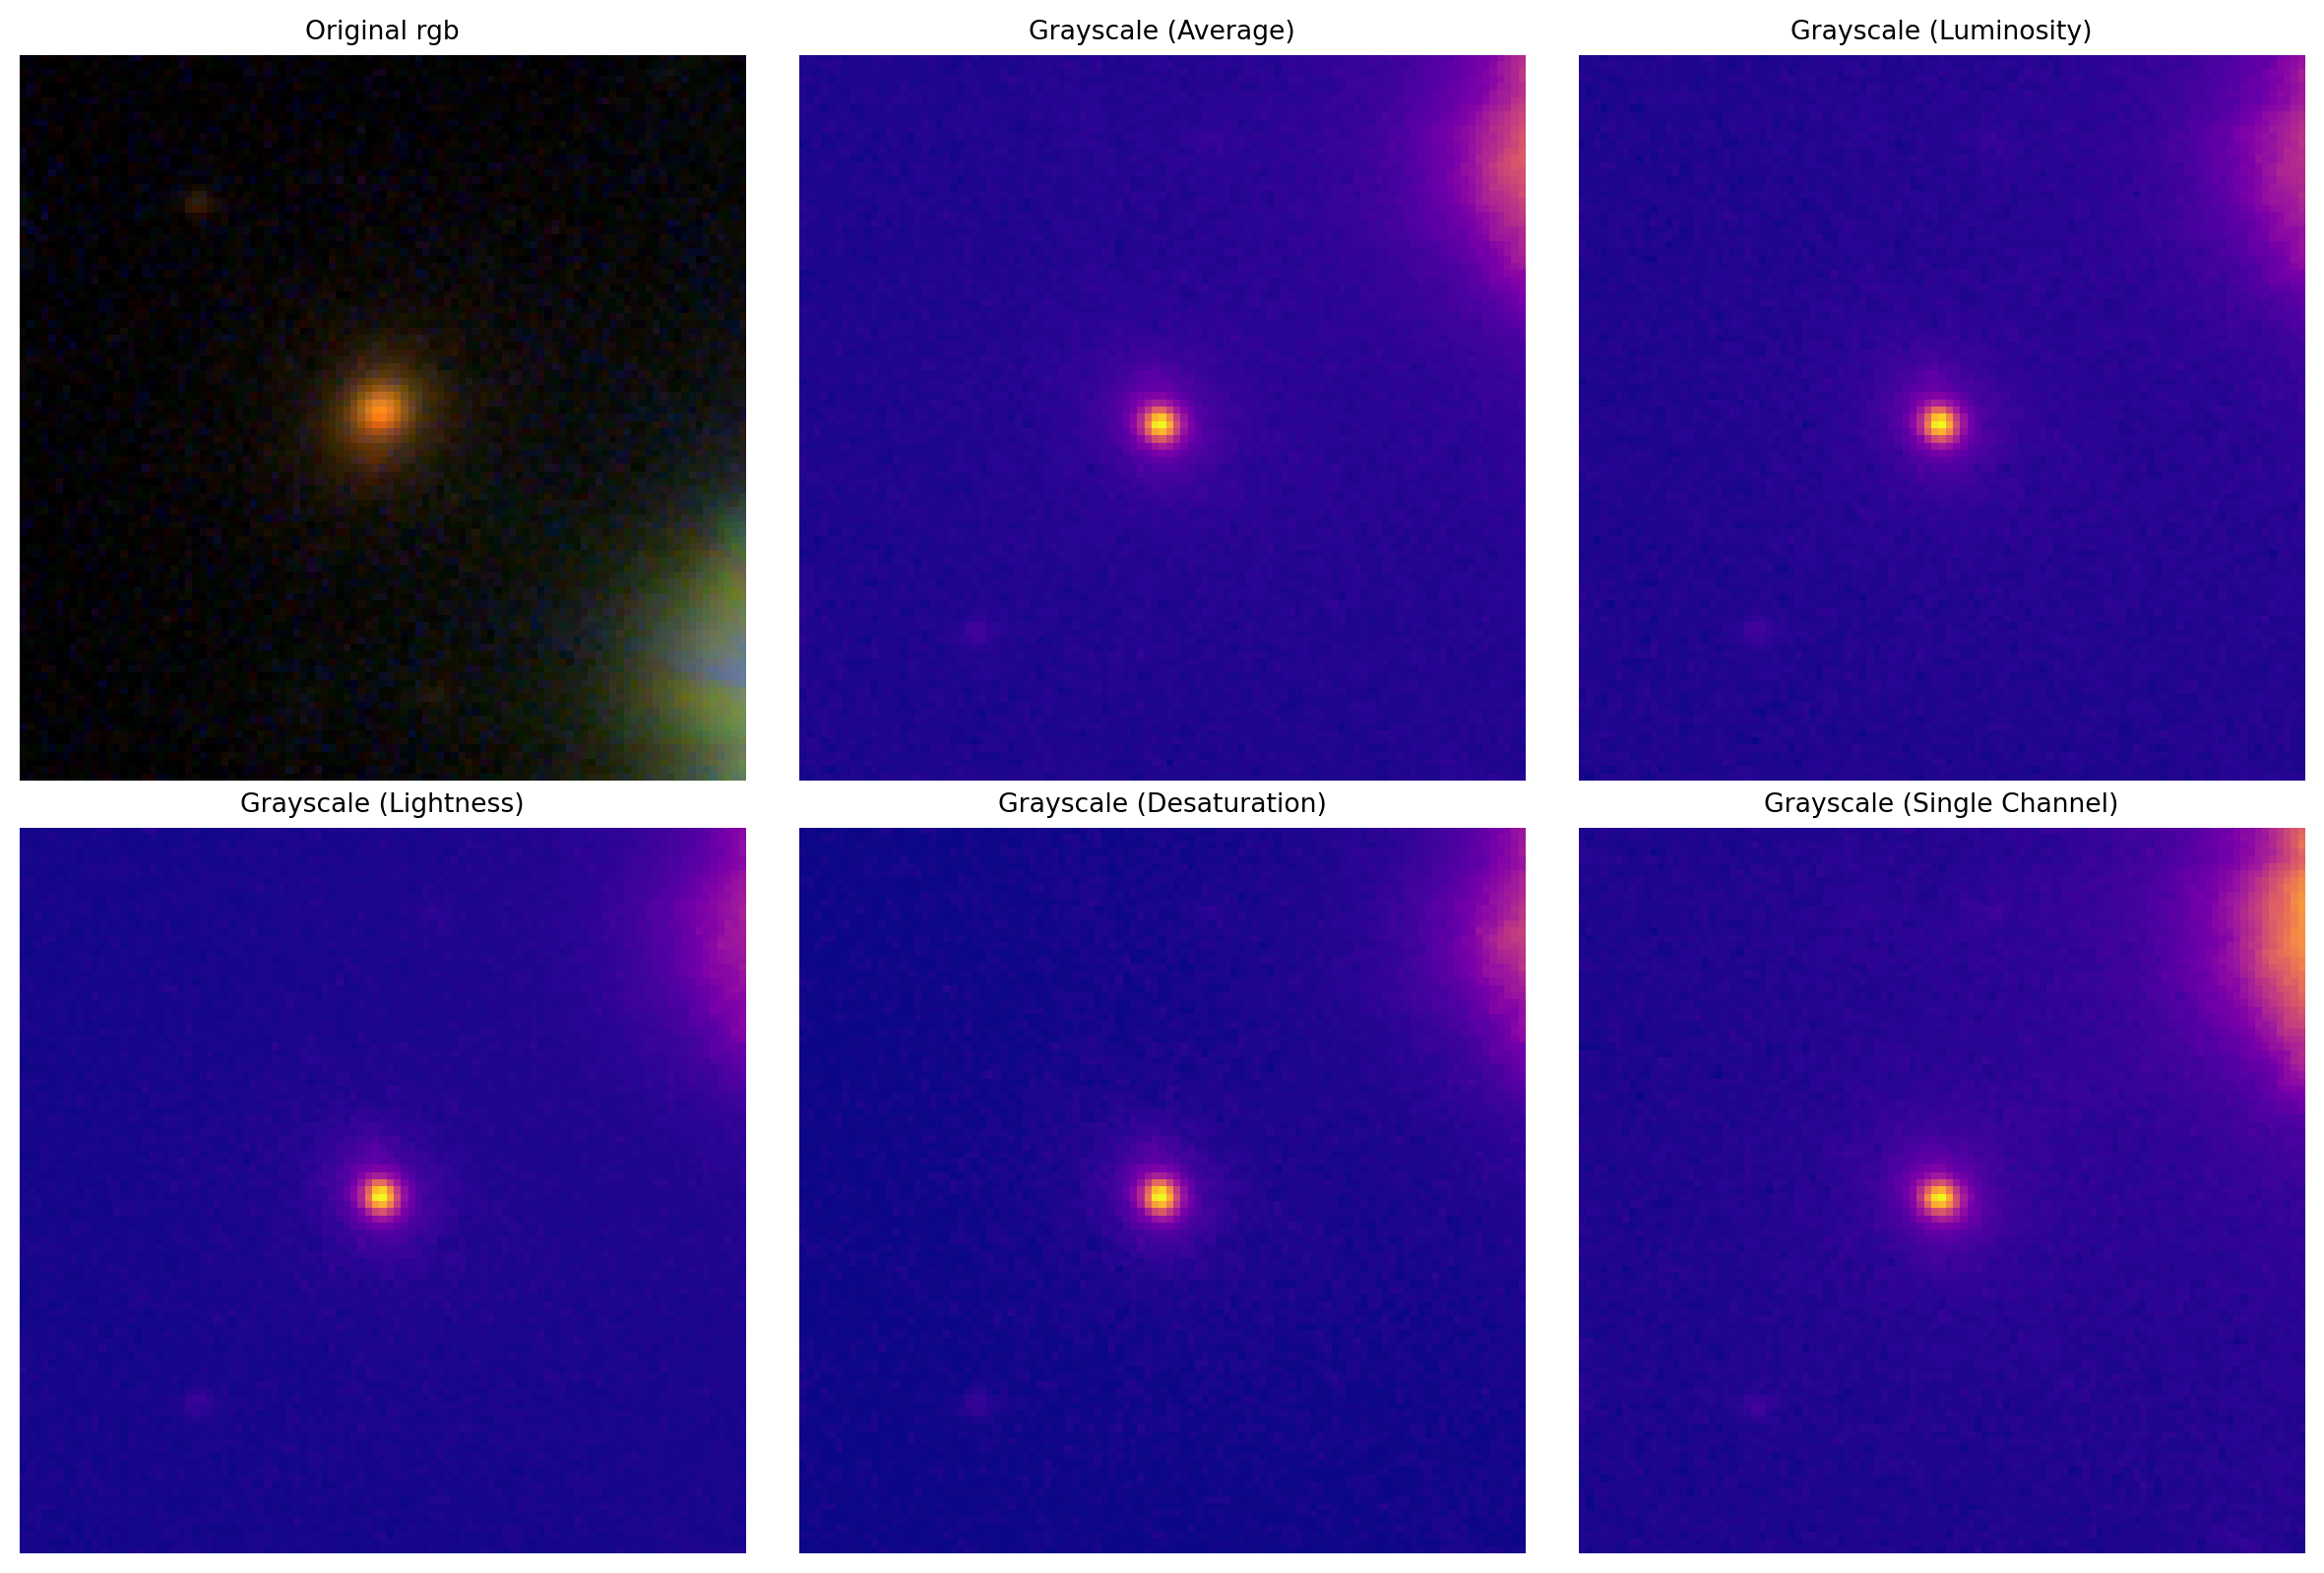

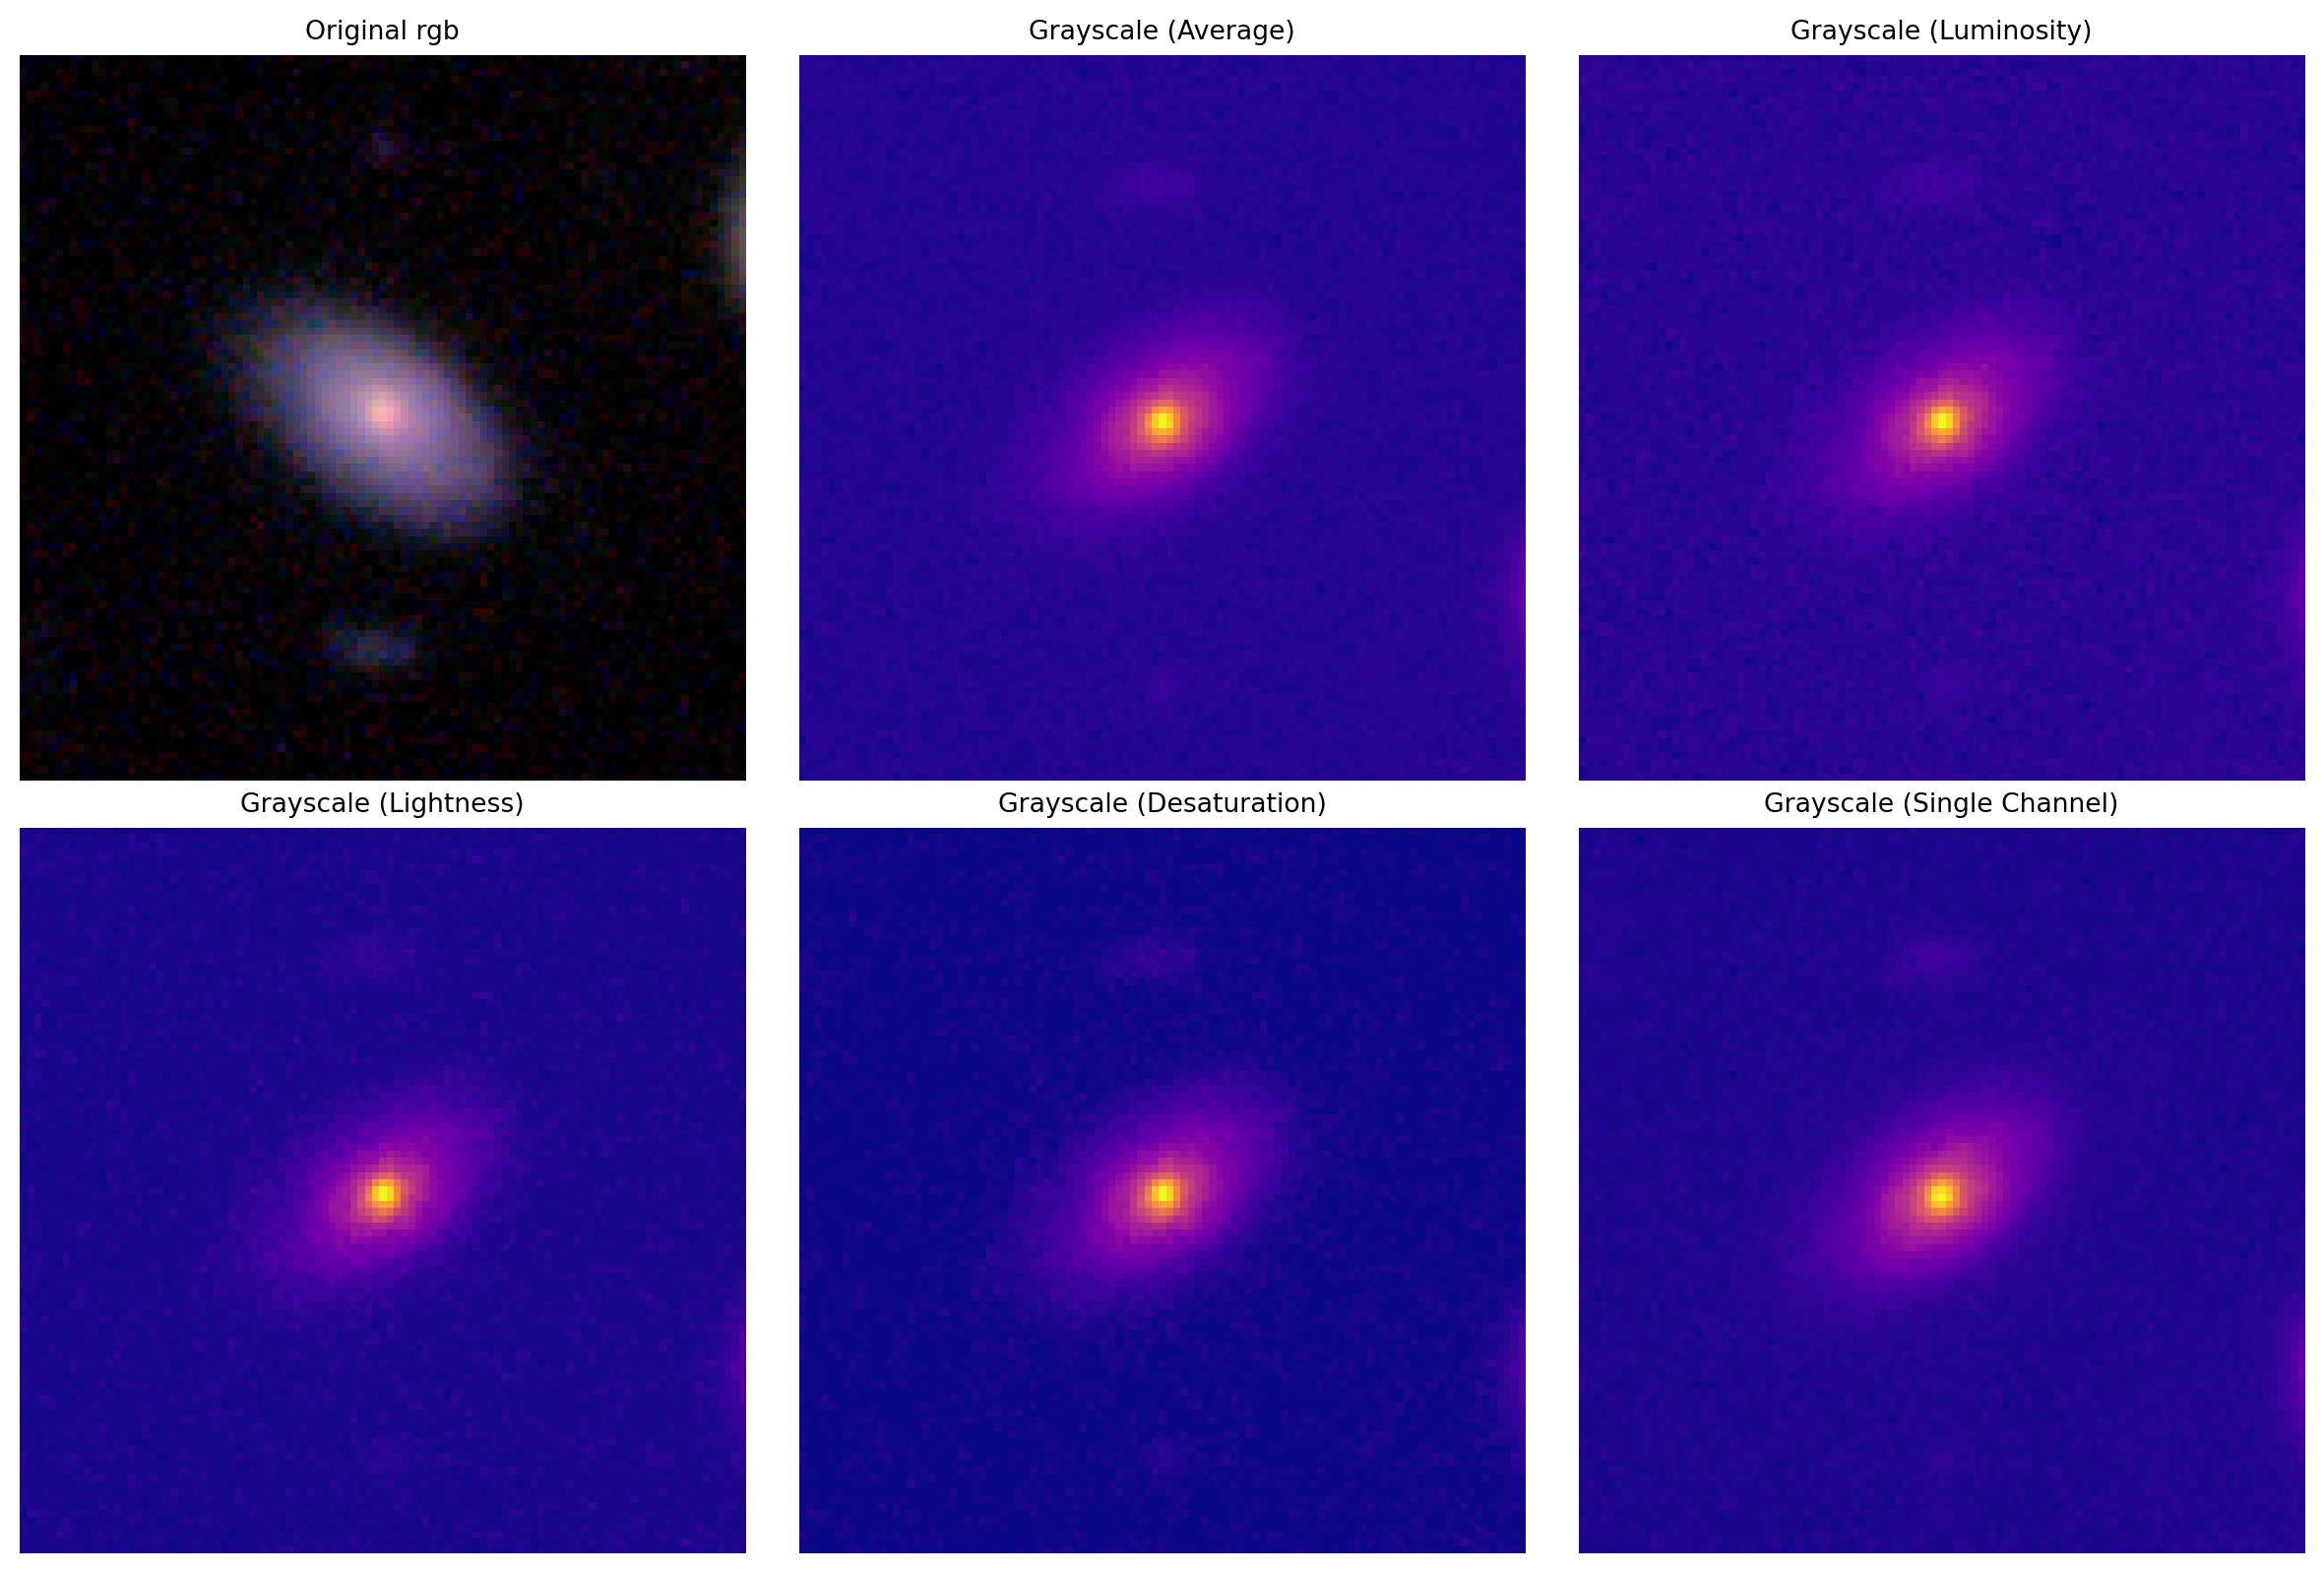

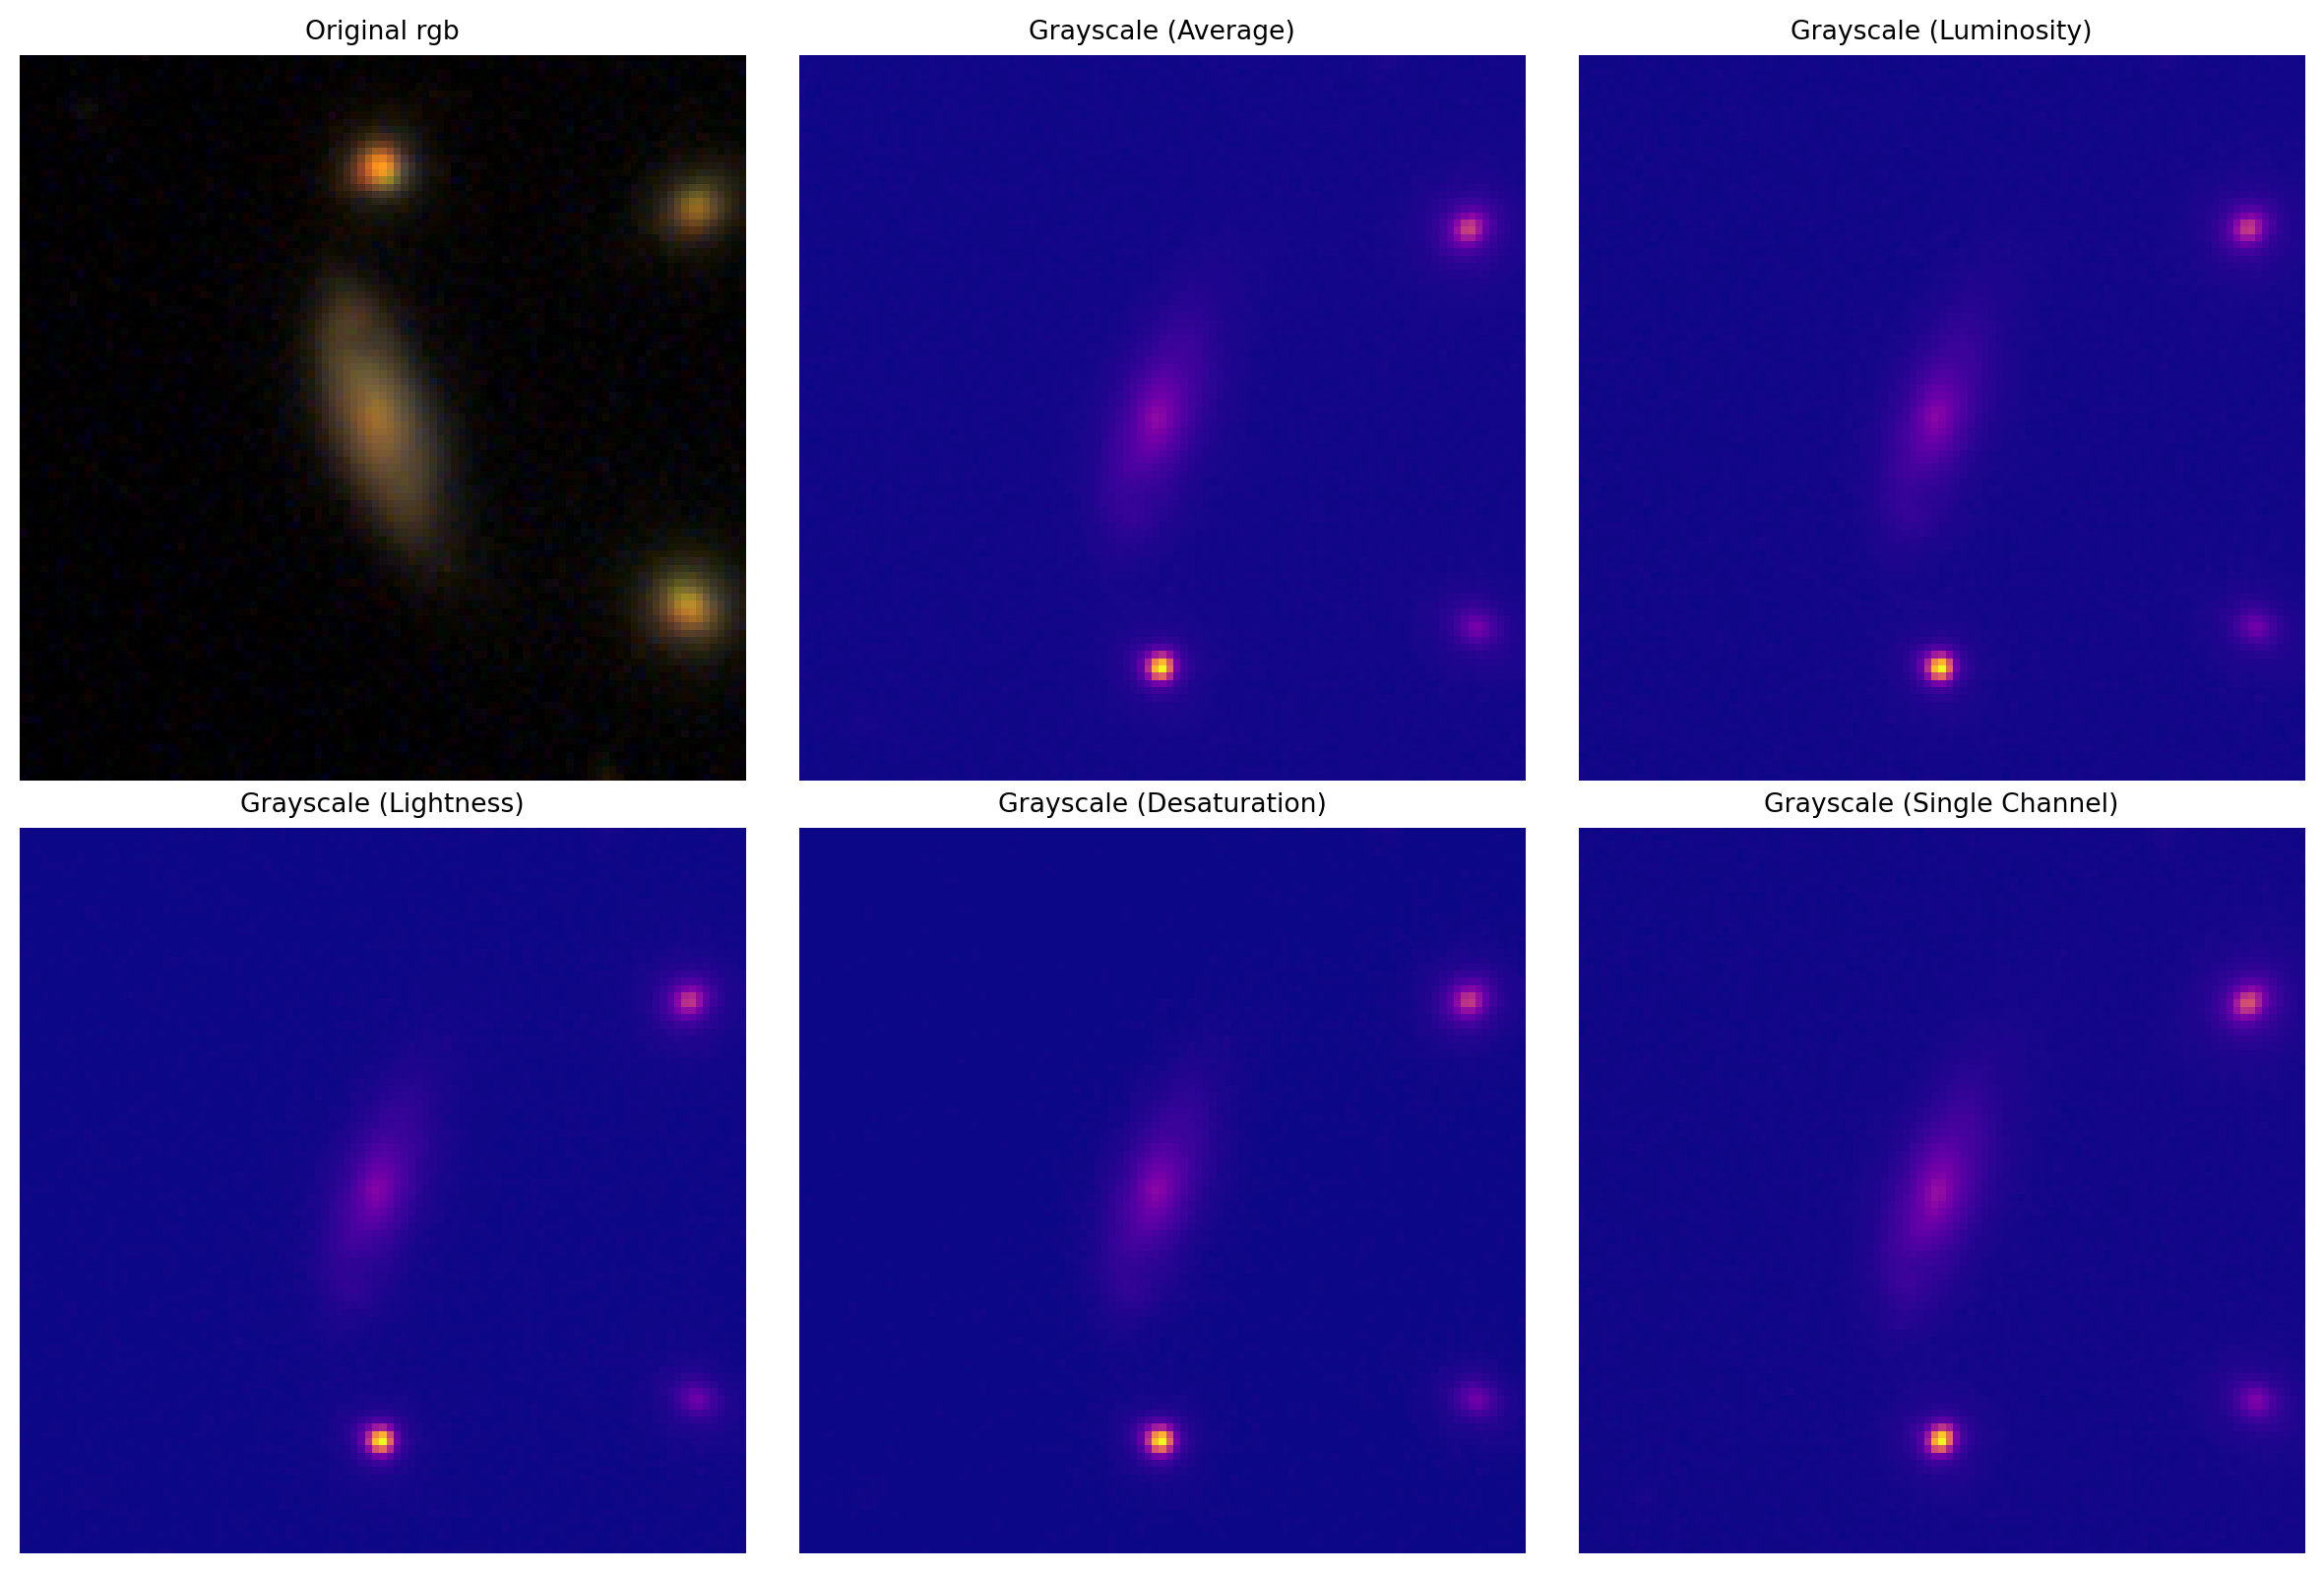

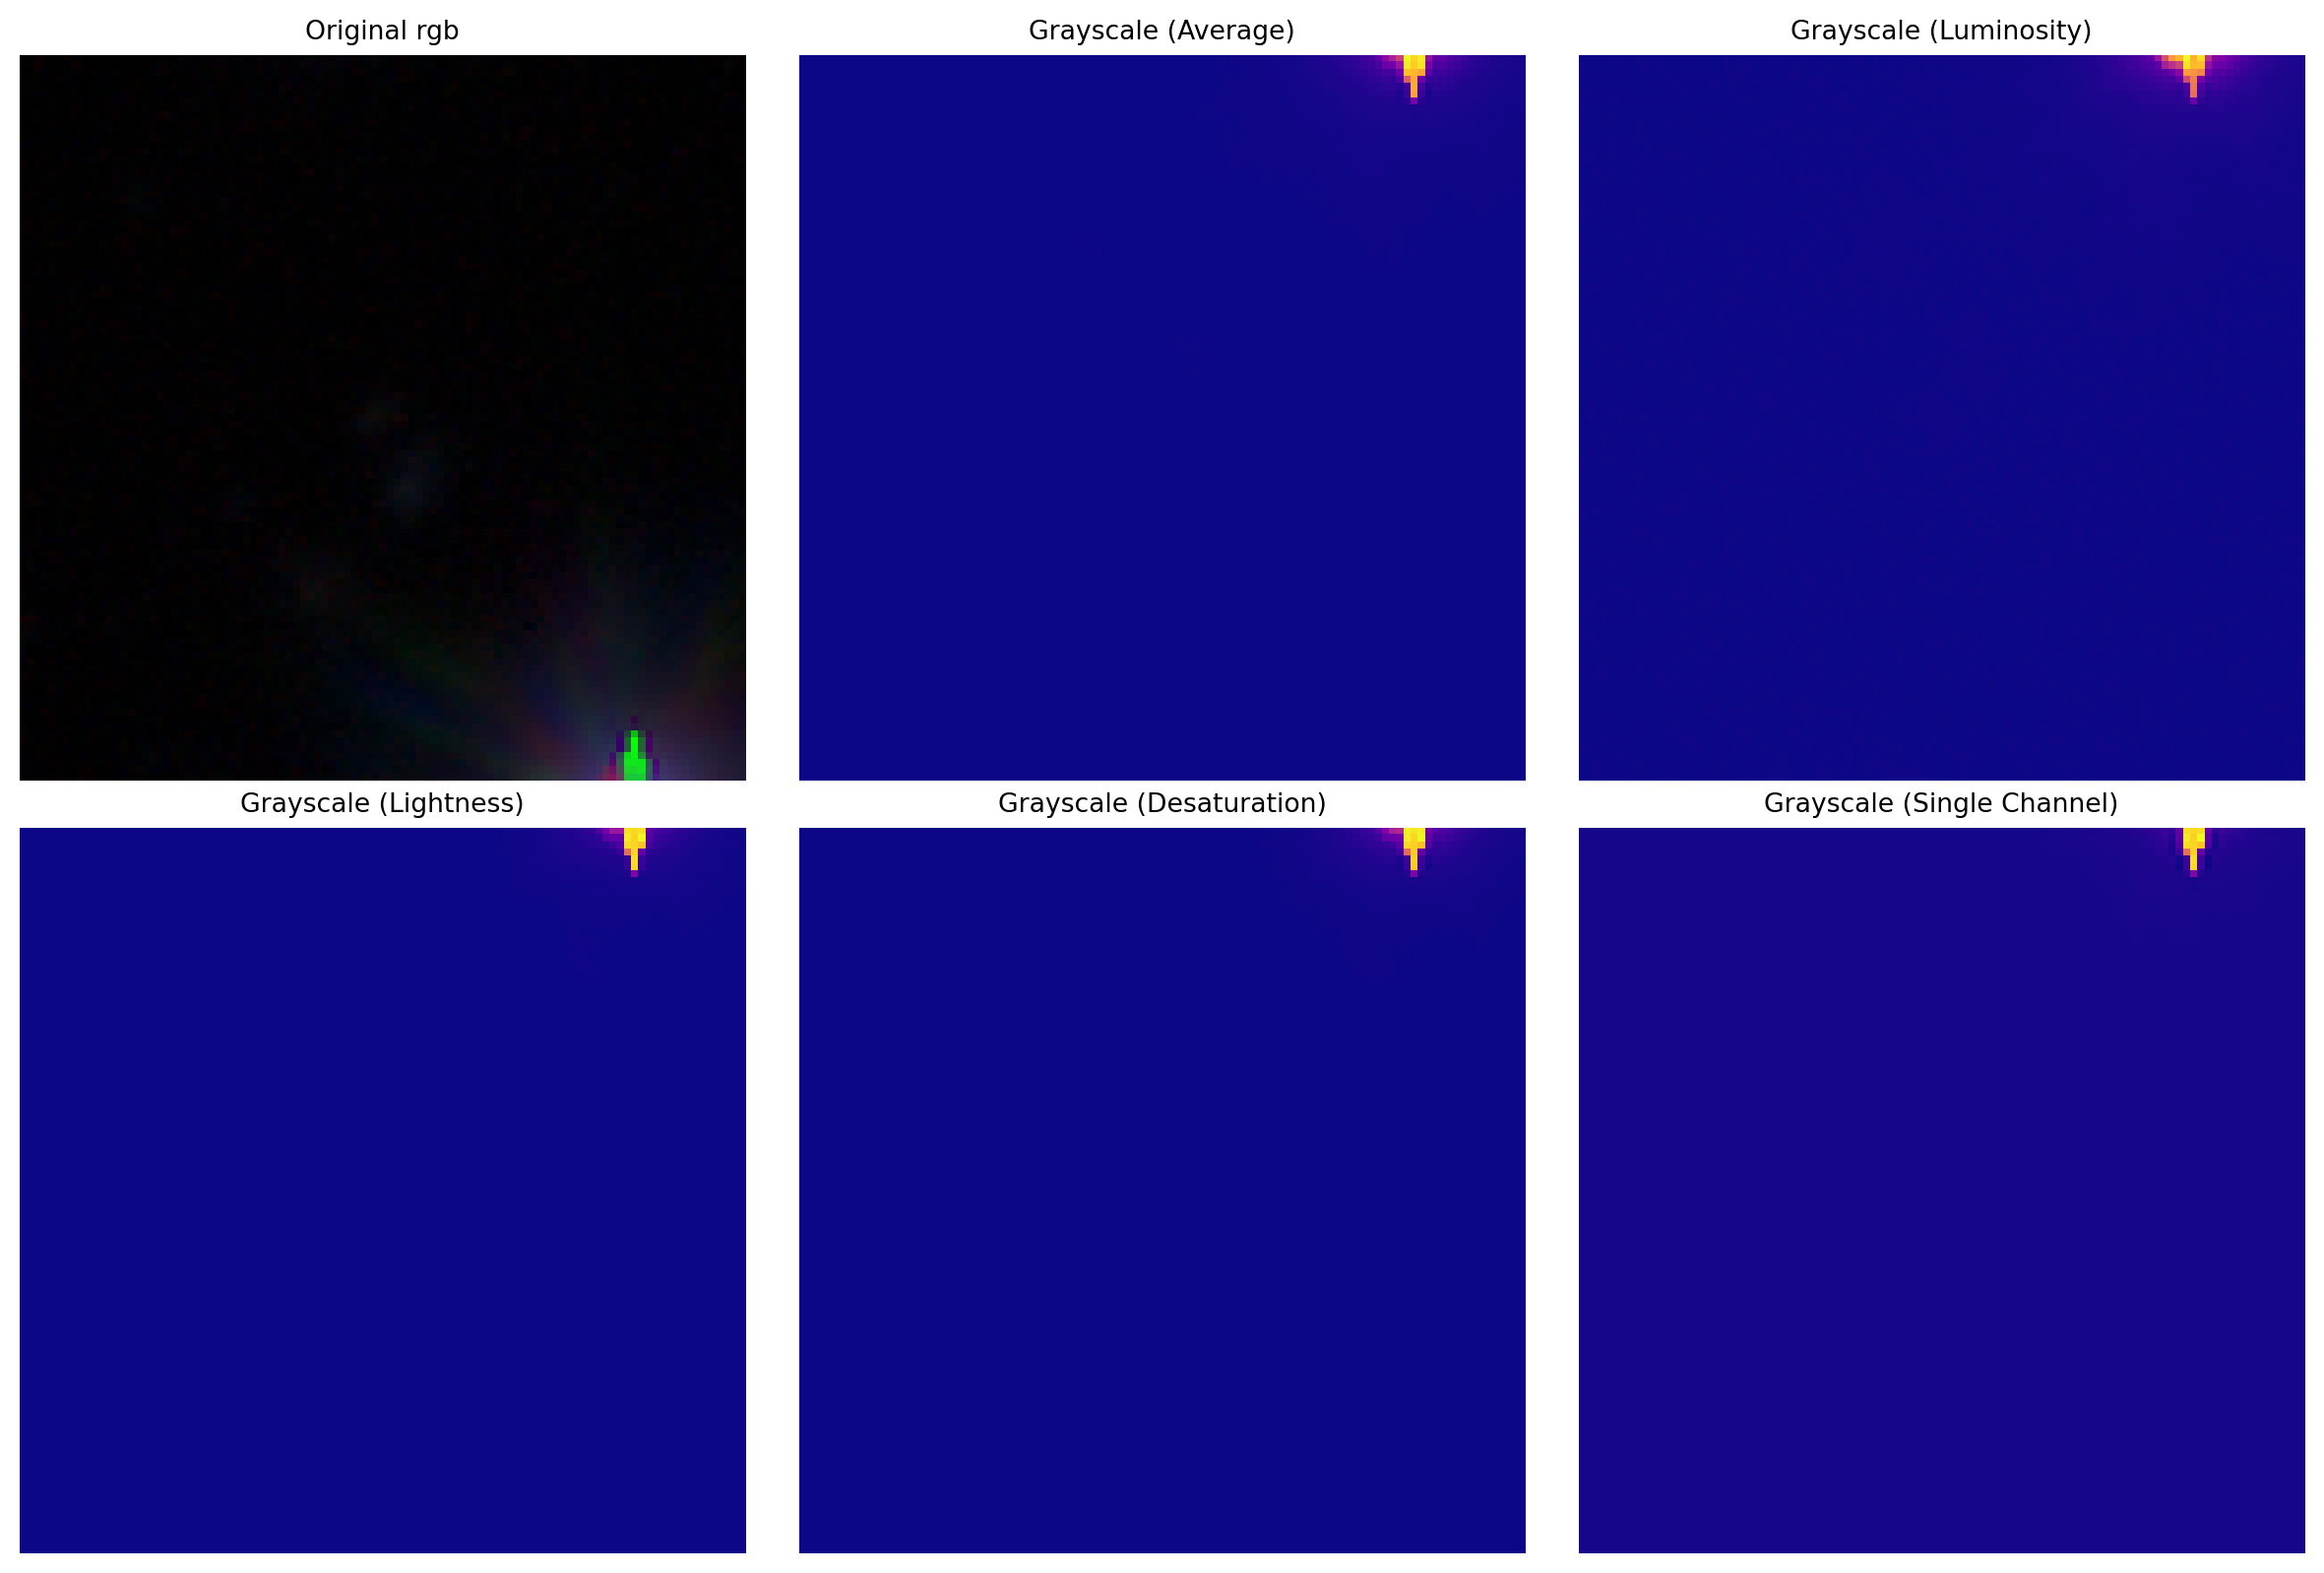

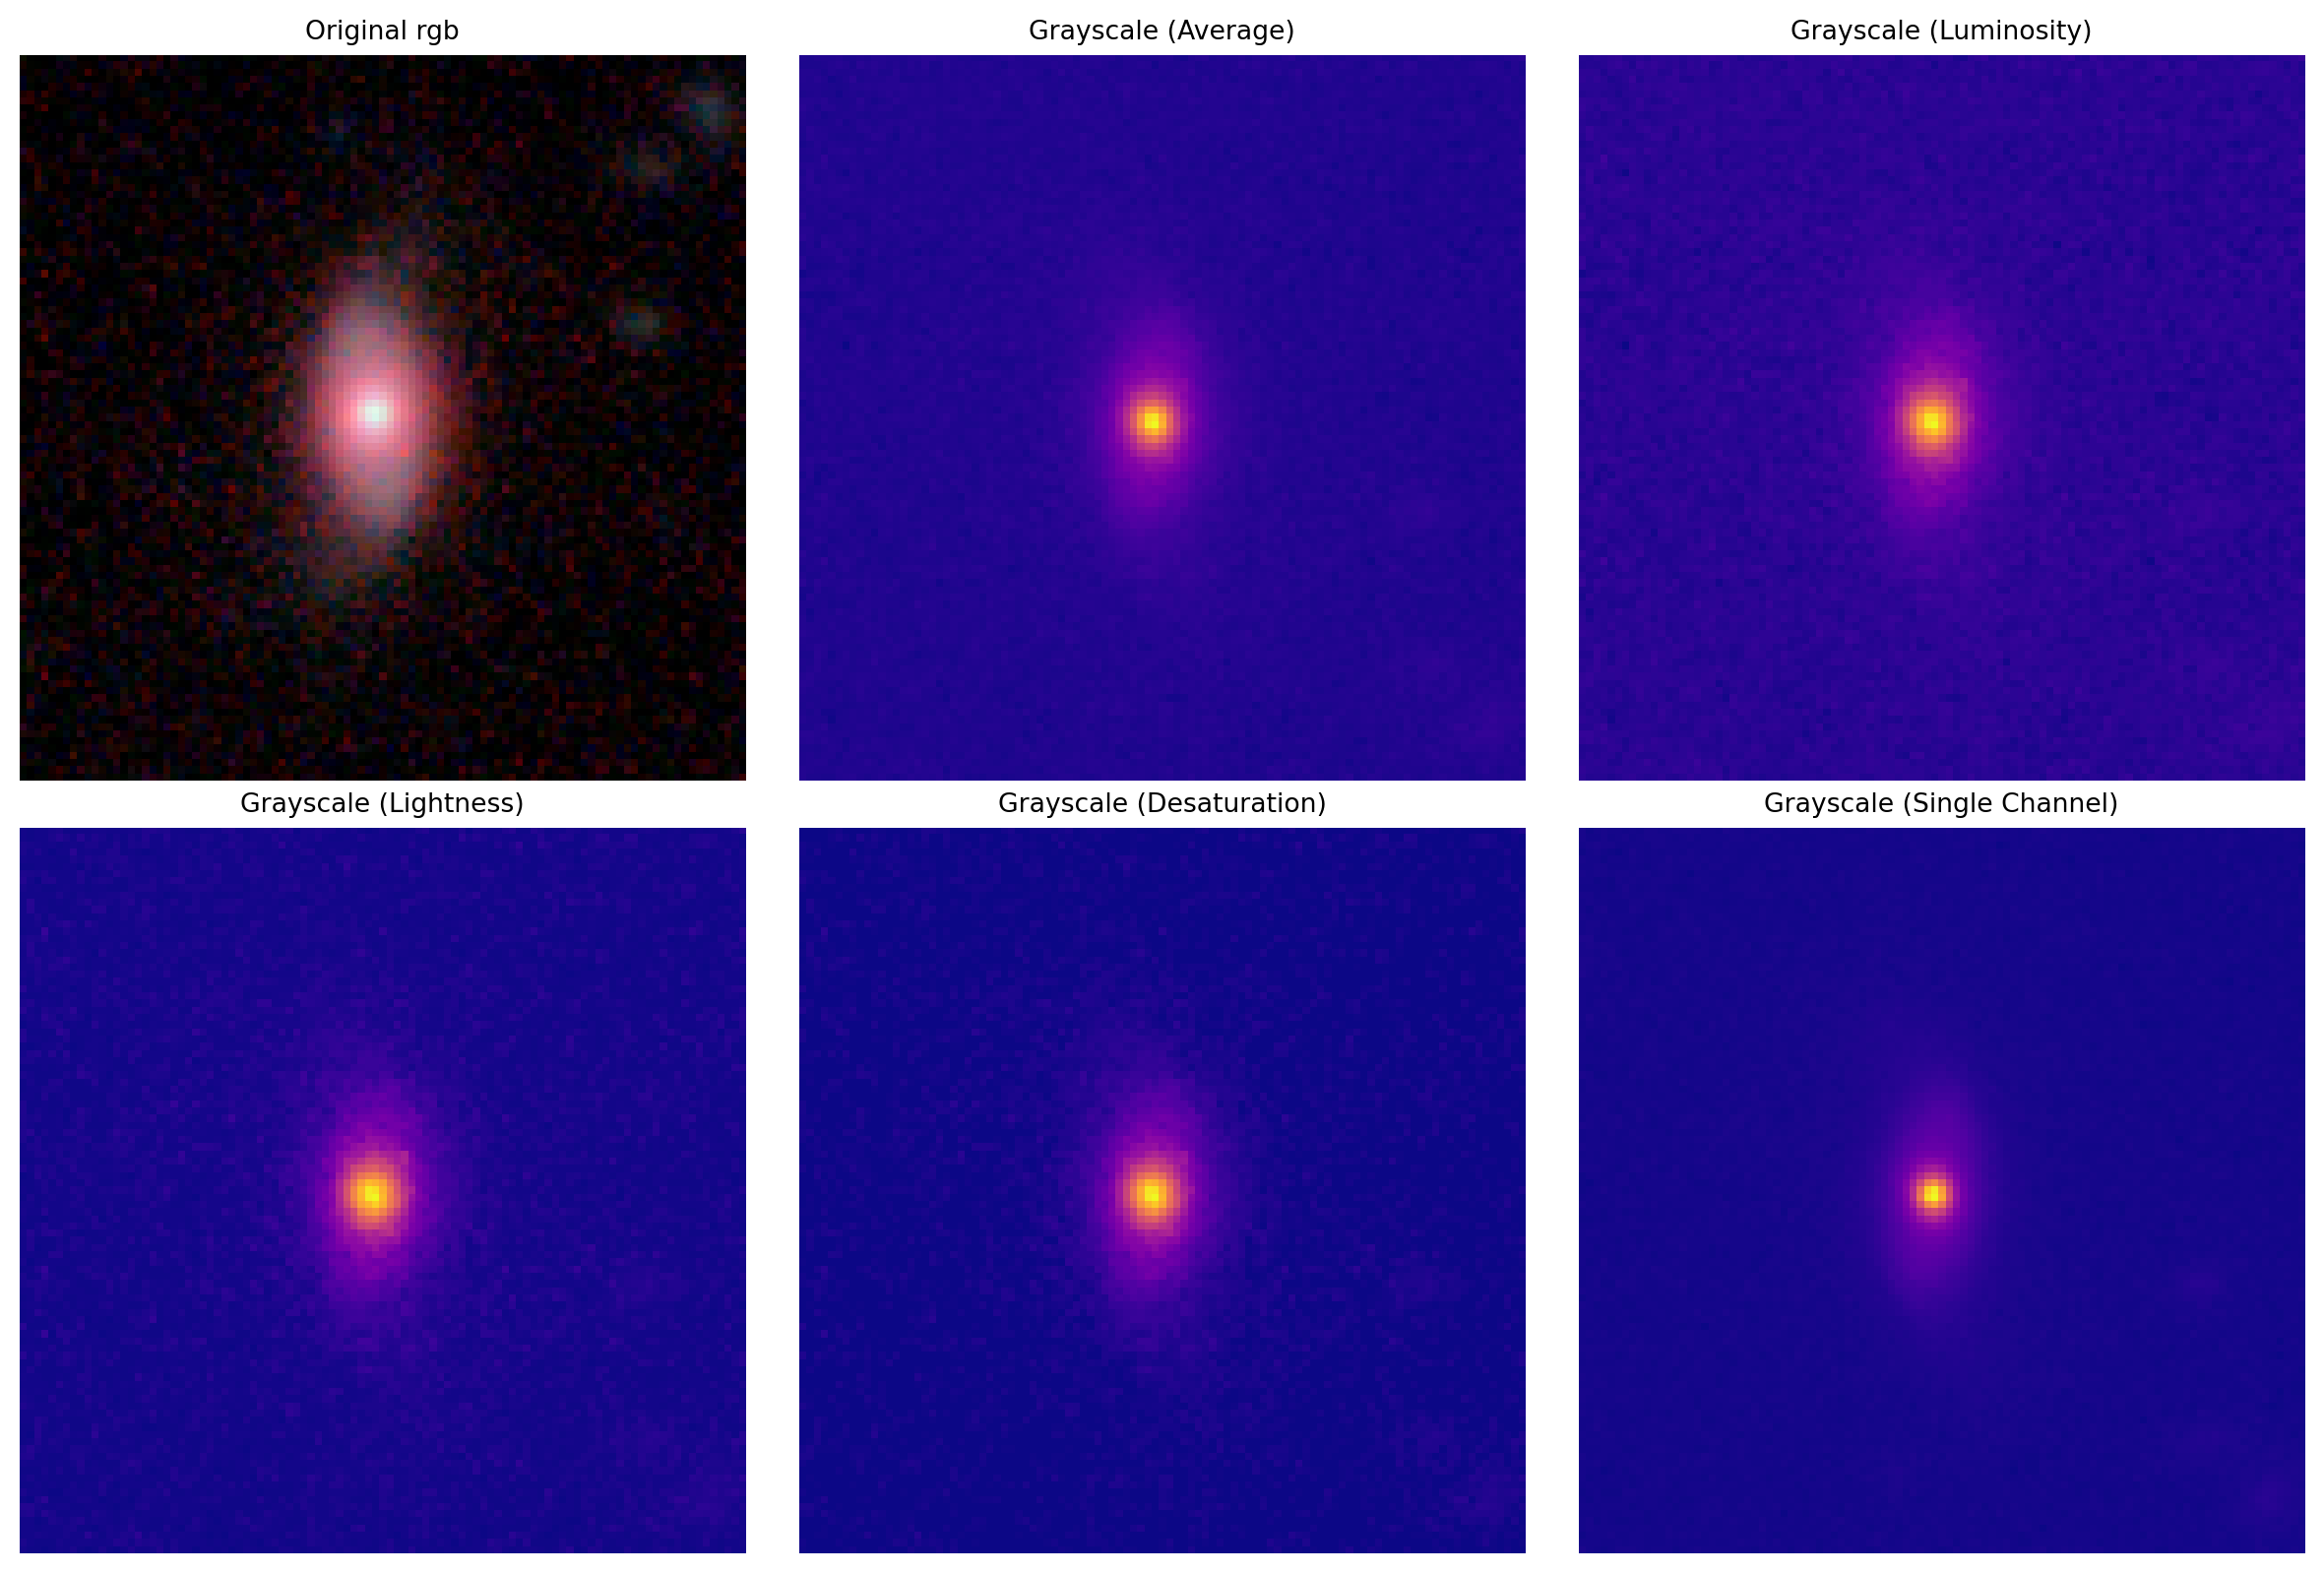

In [124]:
df_list_obj= pd.read_csv(os.path.join(settings.path_to_save_imgs,'mock','df_tot.csv')).drop_duplicates(subset='KIDS_ID').reset_index(drop=True)[:-1]
df_list_obj['FOLDER'] =  os.path.join(settings.path_to_save_imgs,'mock')
#sample = random.sample(range(0, len(df_list_obj) + 1), 10)

for i in sample:
    img = utils.from_fits_to_array(df_list_obj['FOLDER'].iloc[i],
                                df_list_obj['KIDS_ID'].iloc[i] ,df_list_obj[ 'KIDS_TILE'].iloc[i],  
                                channels=['r', 'i','g'])
    img = np.transpose(img, (1,2,0)) 

    all_greys(img,df_list_obj[ 'KIDS_TILE'].iloc[i],df_list_obj['KIDS_ID'].iloc[i], 
              label=df_list_obj[ 'LABEL_TE'].iloc[i],savefig=True, show_plot=False )